The purpose of this notebook is to explore the Wine dataset and understand the relationship between the features.

Version history: Dataexploration_PCA_VisualAnalysis has the following analysis and learning.
- Missing value detection in the given dataset
- outlier detection
- understanding the features of the dataset - subject matter and research about wines.
  (this helps us identify if a value in the dataset can be negative for a certain chemical property)
- understanding the chemical properties present in the wine and how it impacts wine quality
- understanding potential predictors in the dataset through visual analysis and PCA
- Understanding data spread using PCA, identifying the major players that impact models
- Analyze if there is any natural clustering behavior in the dataset and if that can be used for
  imputing the STARS column
- Understanding what is necessary to impute the STARS column
- Whats is the impact of STARS on the sales?


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
#scikit
from sklearn import preprocessing
#plot point label format
from adjustText import adjust_text
#principal components Analysis
from sklearn.decomposition import PCA    
from pandas.plotting import scatter_matrix
# clustering
from sklearn.cluster import KMeans
#Silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt  #pyplot
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('WINE_.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

Definition of variables:
Fixed acidity: Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic)
Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine, Acidity in food and drink tastes tart and zesty. Tasting acidity is also sometimes confused with alcohol. Wines with higher acidity feel lighter-bodied because they come across as “spritzy”. Reducing acids significantly might lead to wines tasting flat. If you prefer a wine that is richer and rounder, you enjoy slightly less acidity.

Volatile acidity: These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavour.

Citric acid: This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness.

Residual sugar: This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped.

Chlorides: Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains.

Free sulfur dioxide: This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour.

Total sulfur dioxide: This is the sum total of the bound and the free sulfur dioxide. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.

Density: This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol.

pH: Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

Sulphates: These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavour.

Alcohol: It's usually measured in % vol or alcohol by volume (ABV).

STARS: Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

In [4]:
df.describe()

INDEX        TARGET  FixedAcidity  VolatileAcidity  \
count  12795.000000  12795.000000  12795.000000     12795.000000   
mean    8069.980305      3.029074      7.075717         0.324104   
std     4656.905107      1.926368      6.317643         0.784014   
min        1.000000      0.000000    -18.100000        -2.790000   
25%     4037.500000      2.000000      5.200000         0.130000   
50%     8110.000000      3.000000      6.900000         0.280000   
75%    12106.500000      4.000000      9.500000         0.640000   
max    16129.000000      8.000000     34.400000         3.680000   

         CitricAcid  ResidualSugar     Chlorides  FreeSulfurDioxide  \
count  12795.000000   12179.000000  12157.000000       12148.000000   
mean       0.308413       5.418733      0.054822          30.845571   
std        0.862080      33.749379      0.318467         148.714558   
min       -3.240000    -127.800000     -1.171000        -555.000000   
25%        0.030000      -2.000000     -0.031000           0.000000   
50%        0.310000       3.900000      0.046000          30.000000   
75%        0.580000      15.900000      0.153000          70.000000   
max        3.860000     141.150000      1.351000         623.000000   

       TotalSulfurDioxide       Density            pH     Sulphates  \
count        12113.000000  12795.000000  12400.000000  11585.000000   
mean           120.714233      0.994203      3.207628      0.527112   
std            231.913211      0.026538      0.679687      0.932129   
min           -823.000000      0.888090      0.480000     -3.130000   
25%             27.000000      0.987720      2.960000      0.280000   
50%            123.000000      0.994490      3.200000      0.500000   
75%            208.000000      1.000515      3.470000      0.860000   
max           1057.000000      1.099240      6.130000      4.240000   

            Alcohol   LabelAppeal     AcidIndex        STARS  
count  12142.000000  12795.000000  12795.000000  9436.000000  
mean      10.489236     -0.009066      7.772724     2.041755  
std        3.727819      0.891089      1.323926     0.902540  
min       -4.700000     -2.000000      4.000000     1.000000  
25%        9.000000     -1.000000      7.000000     1.000000  
50%       10.400000      0.000000      8.000000     2.000000  
75%       12.400000      1.000000      8.000000     3.000000  
max       26.500000      2.000000     17.000000     4.000000

Based on our reading of the subject matter on wine, 
Columns like FixedAcidity, CitricAcid, ResidualSugar and others should be either 0 or >0. 

According to studies posted on various websites, the chemical properties of the wine may not be measured in negative values. Only positive values describe if certain chemicals exist in wine. 

Hence their measurement has to be either positive indicating chemical’s presence or zero for non-existence. Assuming there is a dataerror during collection, I will convert all negative values from chemical property columns to Abs value. This will be done post Data exploration.

In [5]:
   def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Selected dataframe has 16 columns and 12795 Rows.
There are 8 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
STARS                         0            3359               26.3   
Sulphates                    22            1210                9.5   
TotalSulfurDioxide            7             682                5.3   
Alcohol                       2             653                5.1   
FreeSulfurDioxide            11             647                5.1   
Chlorides                     5             638                5.0   
ResidualSugar                 6             616                4.8   
pH                            0             395                3.1   

                    Total Zero Missing Values  % Total Zero Missing Values  \
STARS                                    3359                         26.3   
Sulphates                                1232                          9.6   
TotalSulfurDioxide                        689                          5.4   
Alcohol                                   655                          5.1   
FreeSulfurDioxide                         658                          5.1   
Chlorides                                 643                          5.0   
ResidualSugar                             622                          4.9   
pH                                        395                          3.1   

                   Data Type  
STARS                float64  
Sulphates            float64  
TotalSulfurDioxide   float64  
Alcohol              float64  
FreeSulfurDioxide    float64  
Chlorides            float64  
ResidualSugar        float64  
pH                   float64

In [6]:
print("Total number of rows with atleast one missing value: ", sum(df.isnull().values.any(axis=1)), "which is", round((sum(df.isnull().values.any(axis=1))/len(df.index)*100),2), "percent of total dataset")

Total number of rows with atleast one missing value:  6359 which is 49.7 percent of total dataset


There is approx. 50% of the values that are missing in the complete dataset. We will have to impute them to be able to proceed with modeling. 

Variable STARS has approximately 26% missing values; this could be due to wine not released in the market.

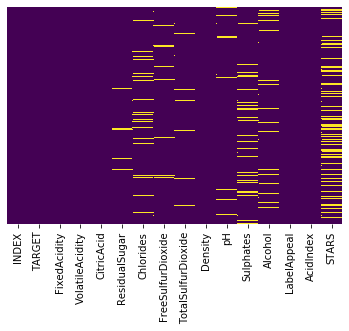

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

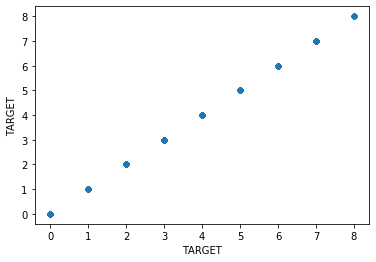

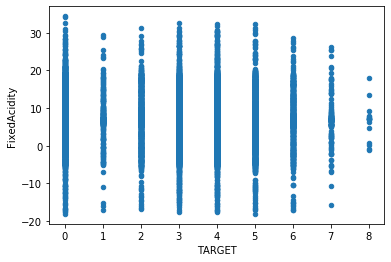

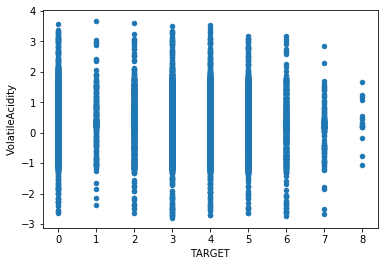

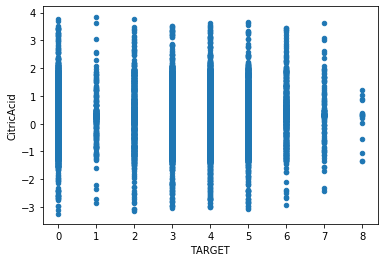

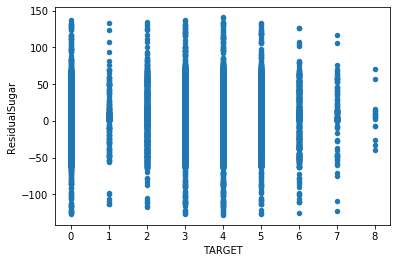

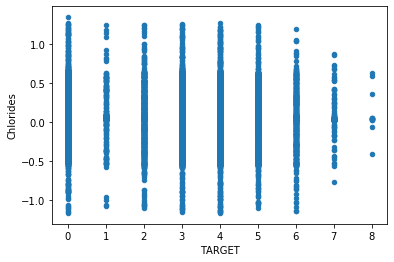

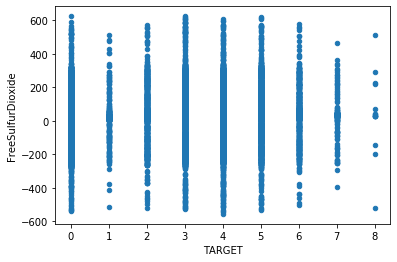

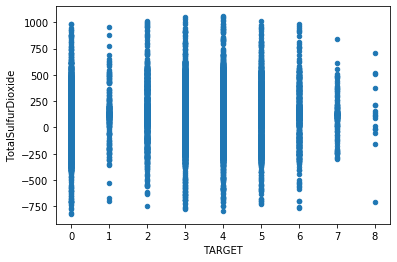

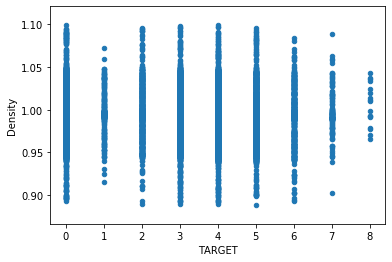

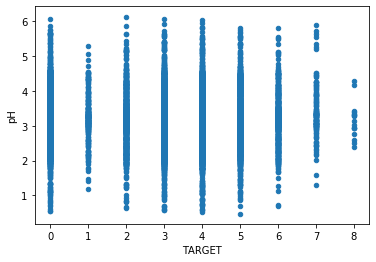

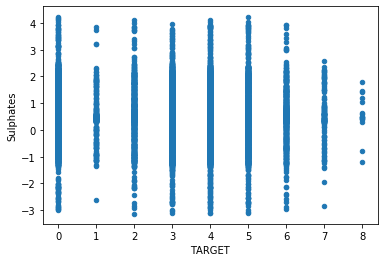

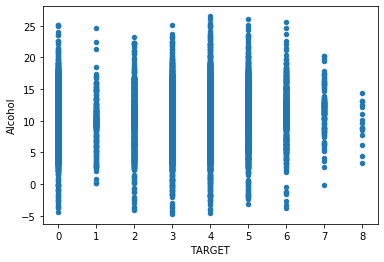

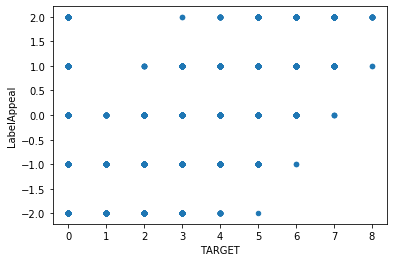

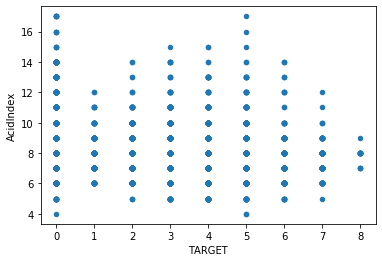

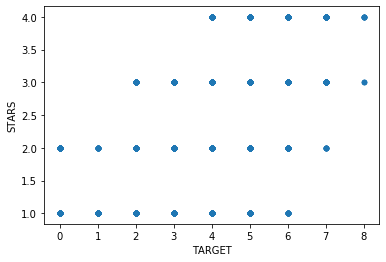

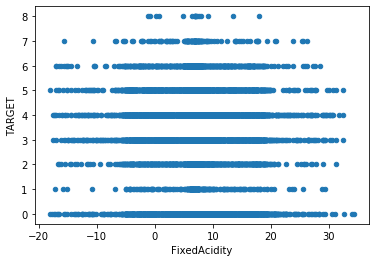

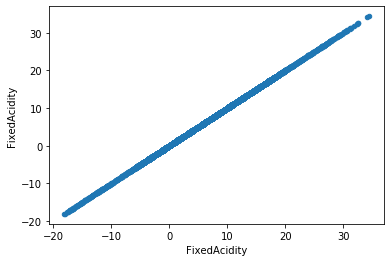

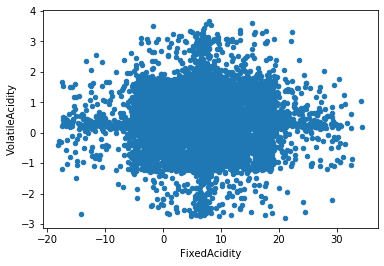

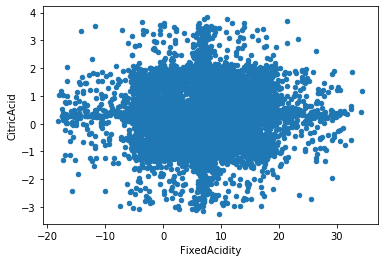

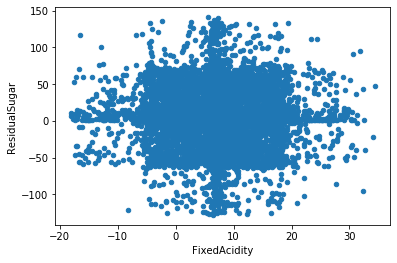

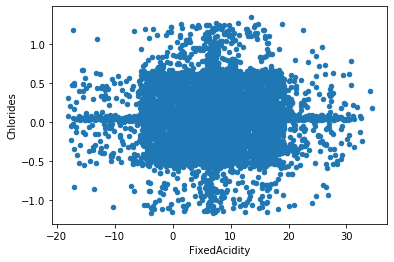

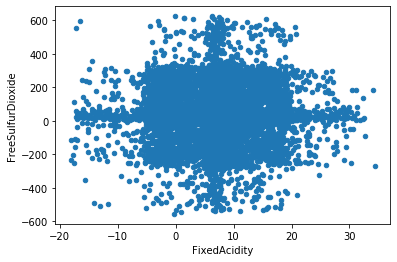

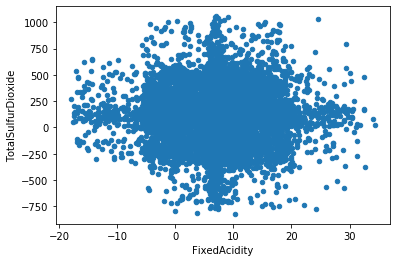

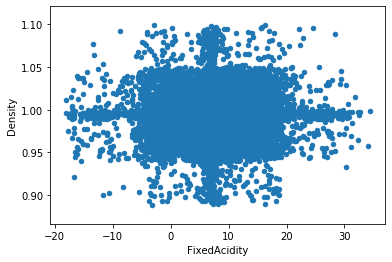

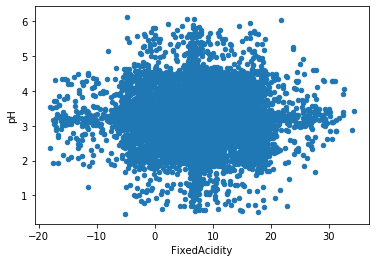

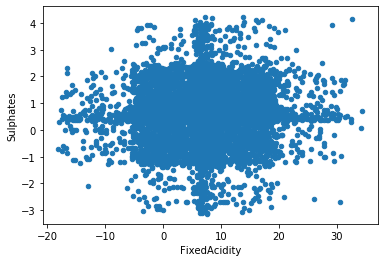

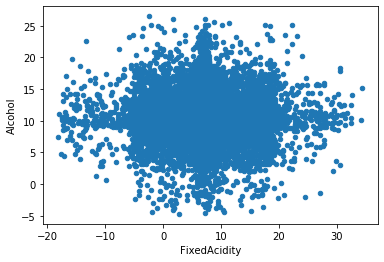

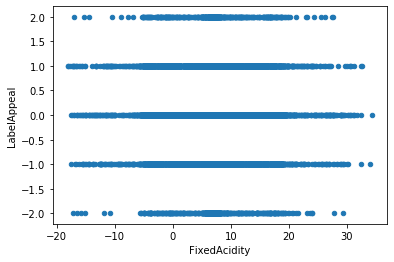

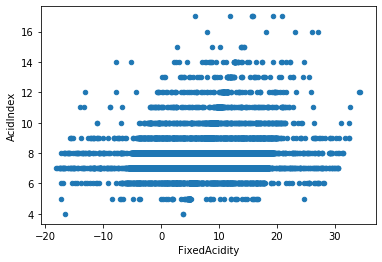

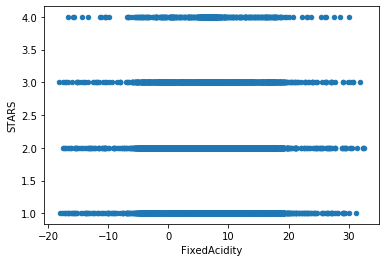

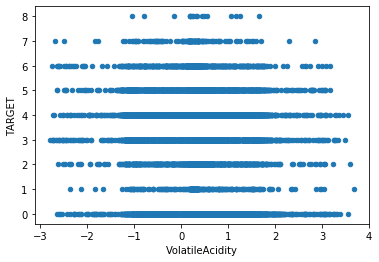

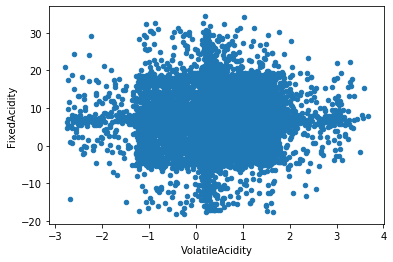

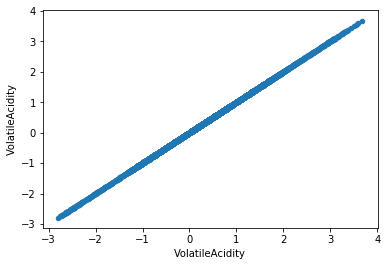

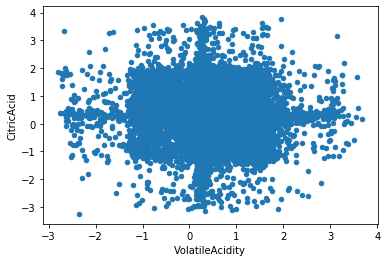

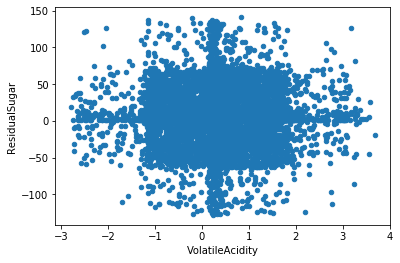

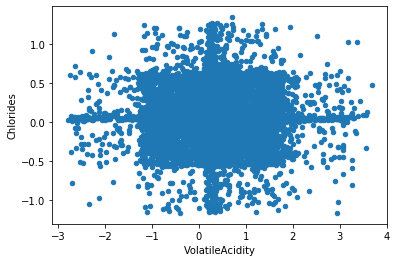

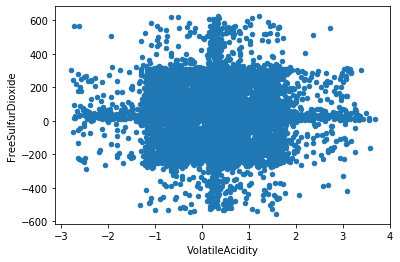

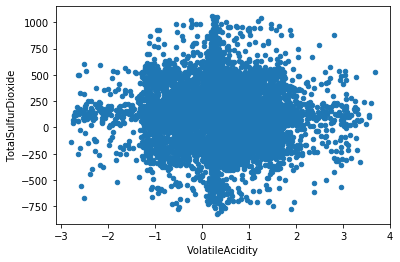

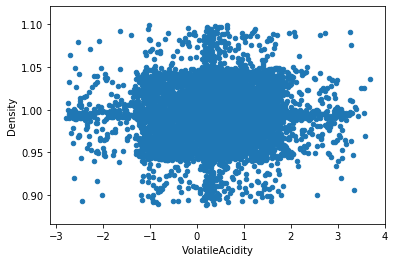

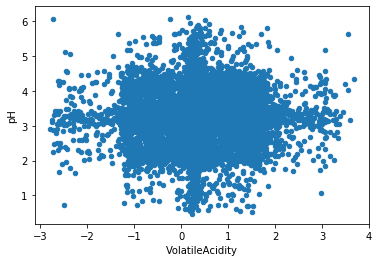

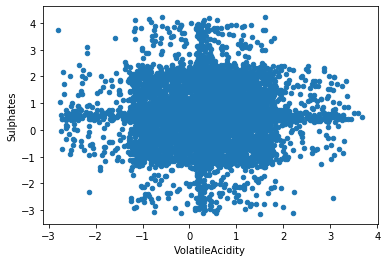

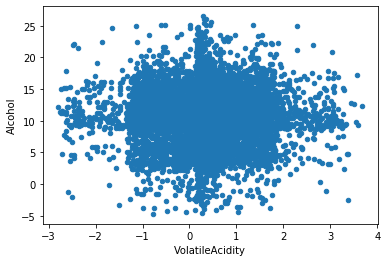

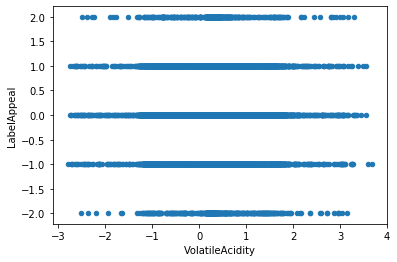

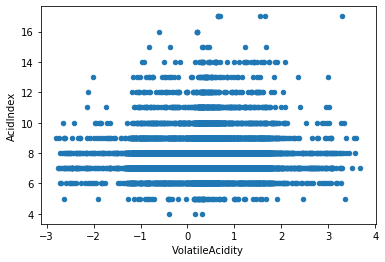

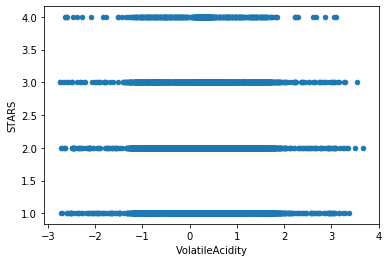

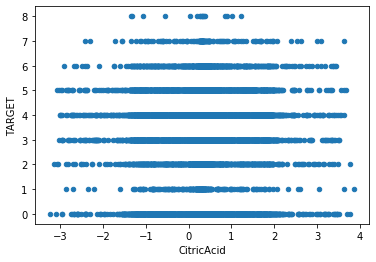

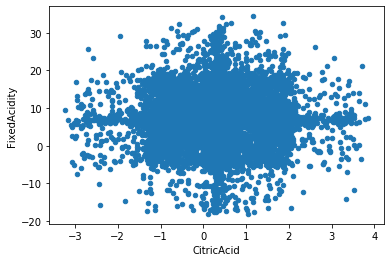

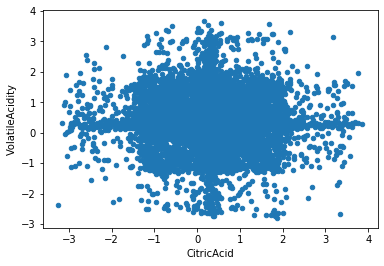

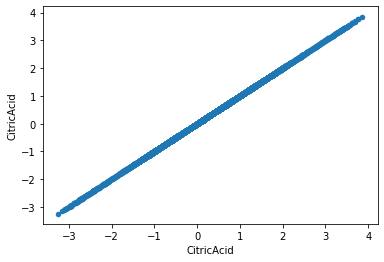

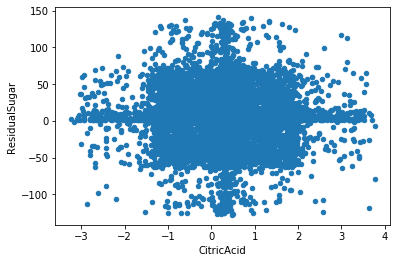

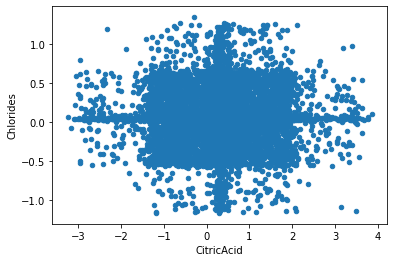

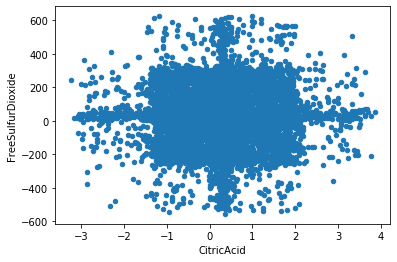

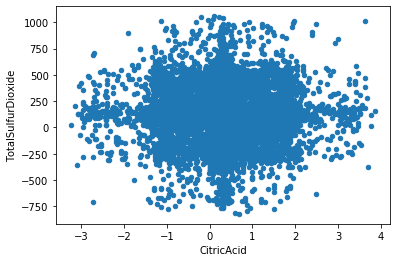

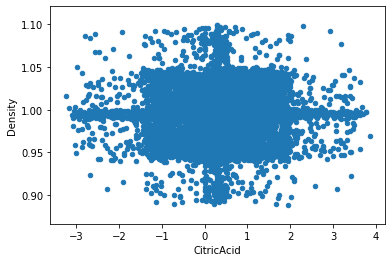

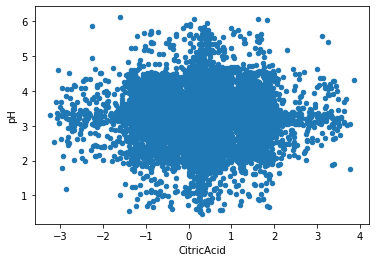

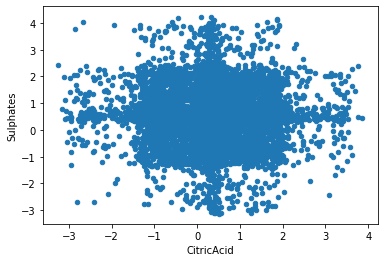

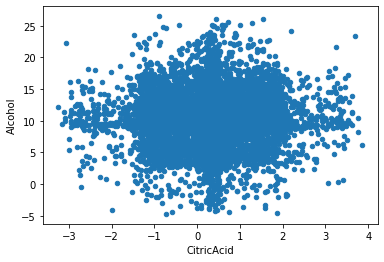

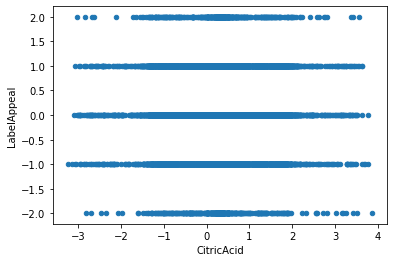

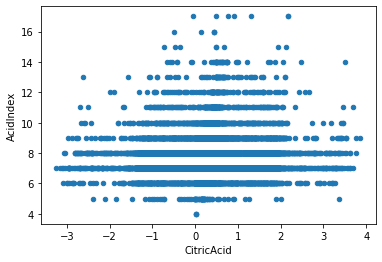

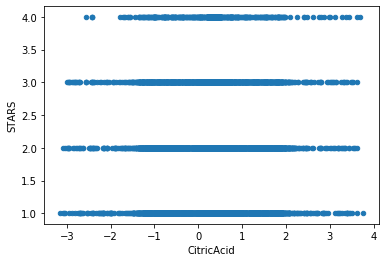

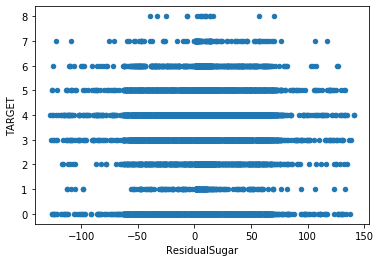

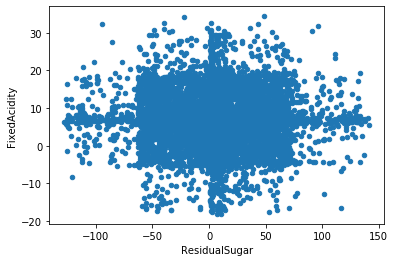

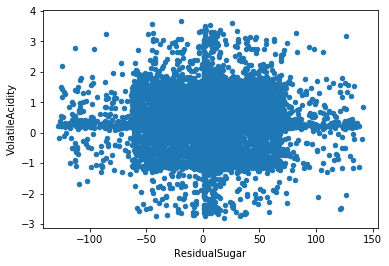

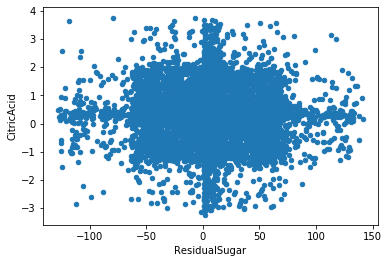

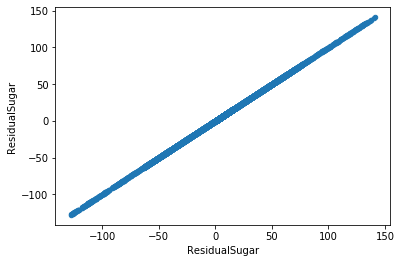

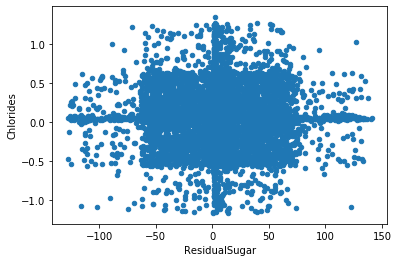

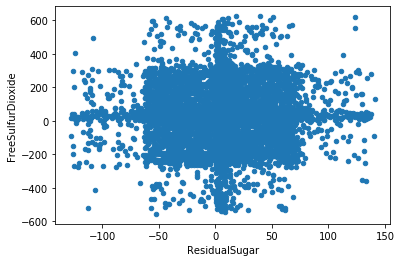

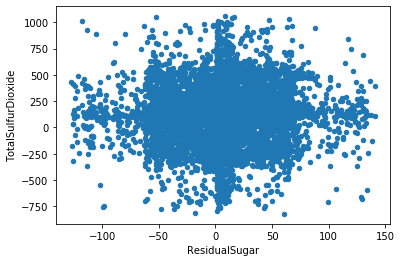

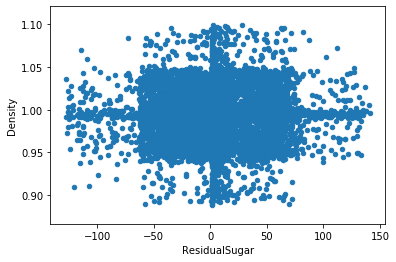

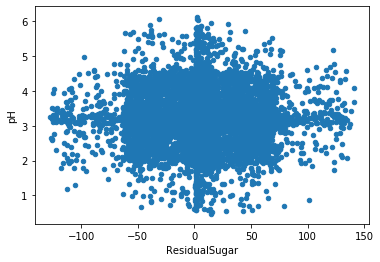

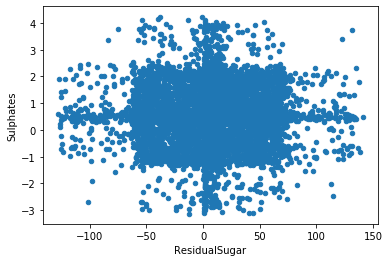

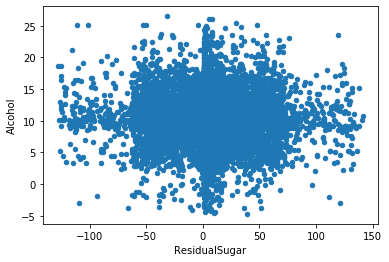

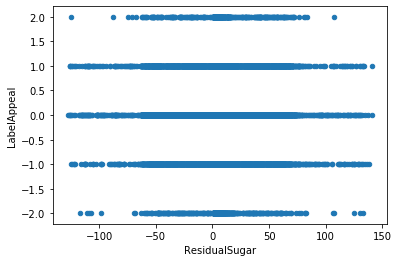

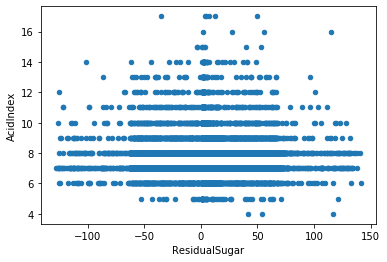

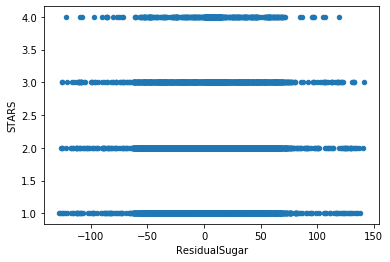

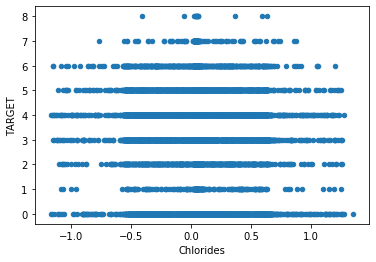

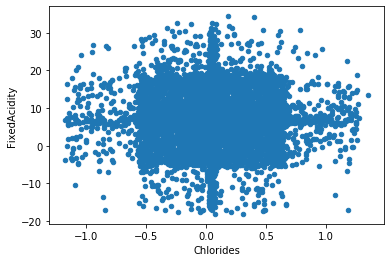

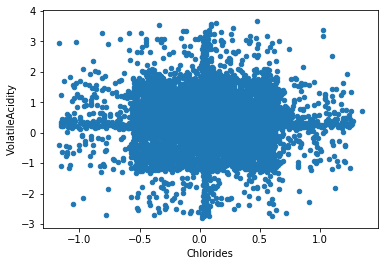

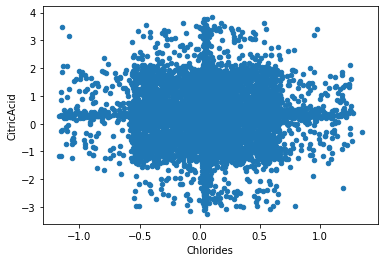

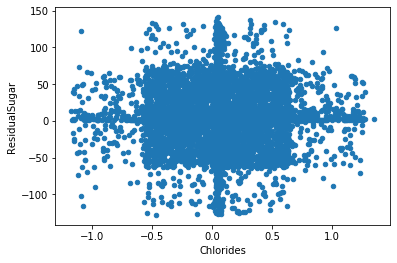

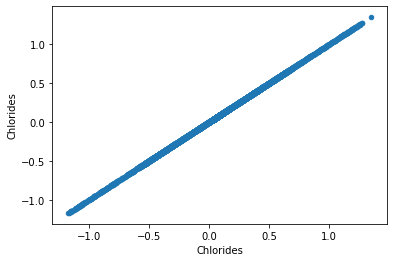

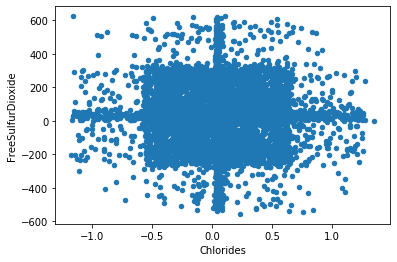

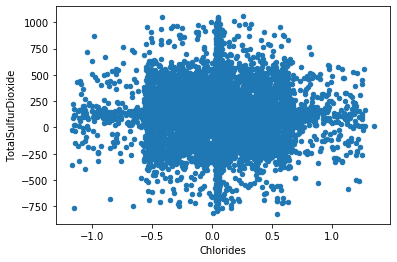

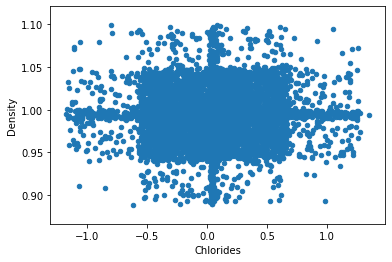

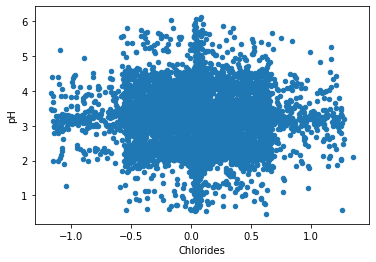

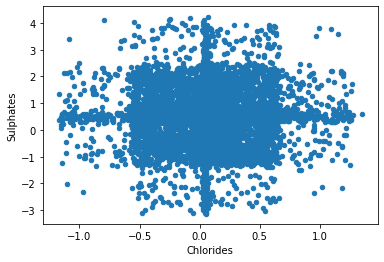

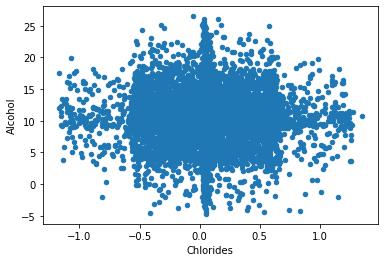

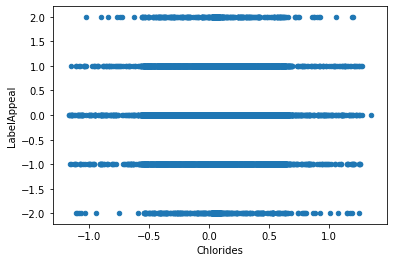

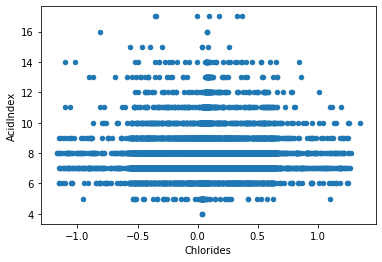

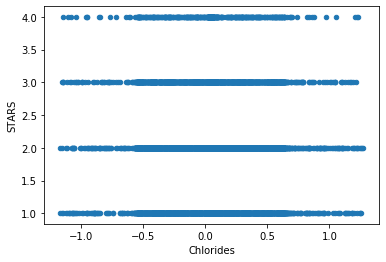

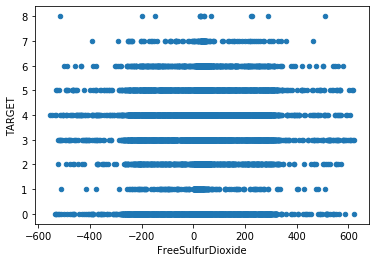

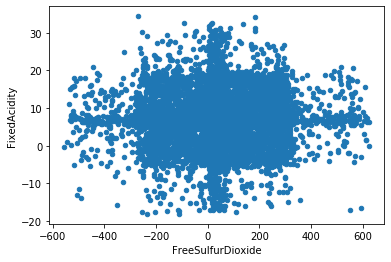

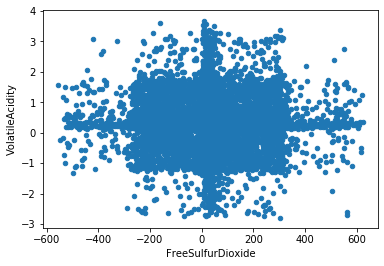

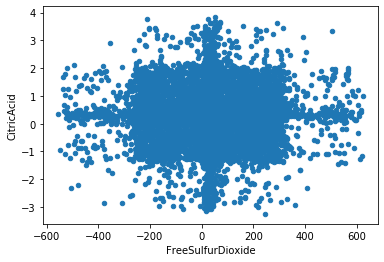

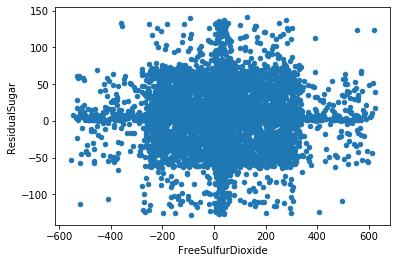

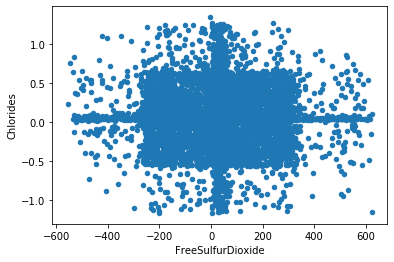

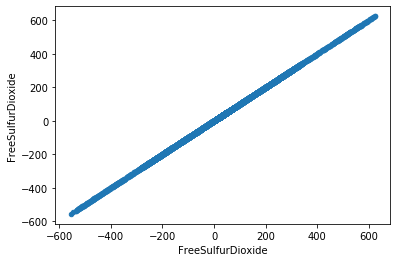

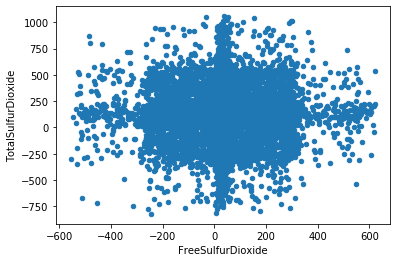

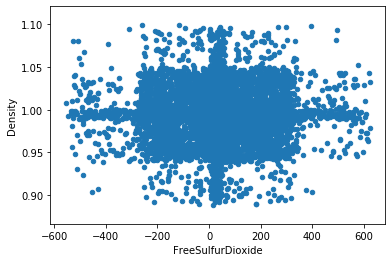

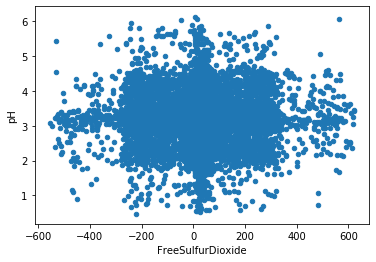

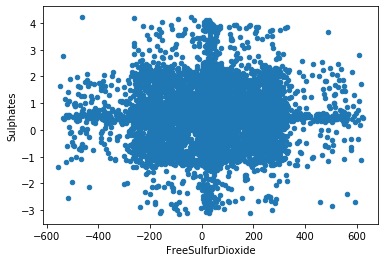

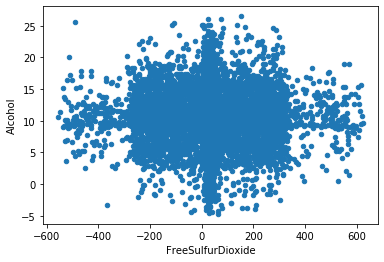

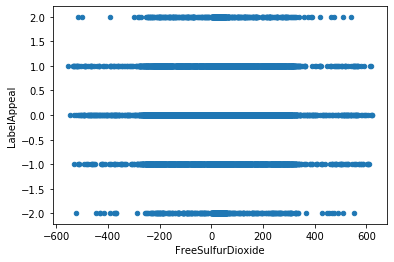

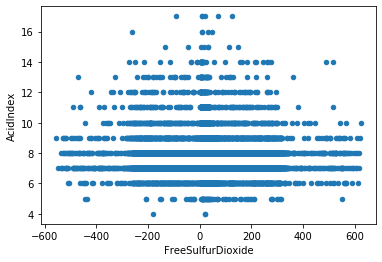

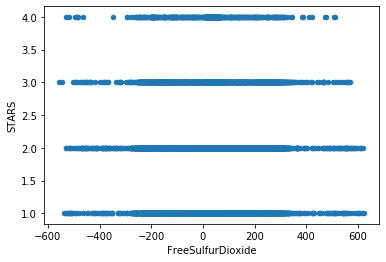

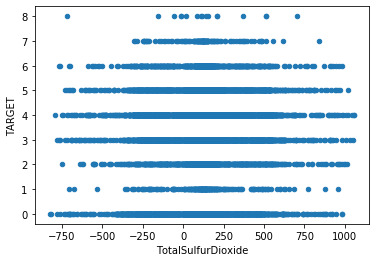

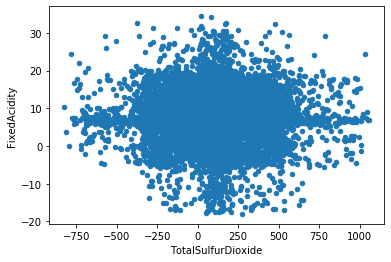

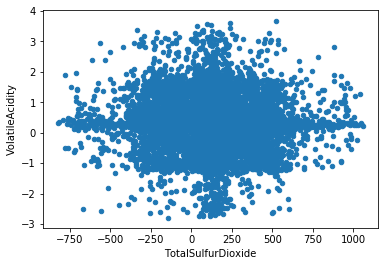

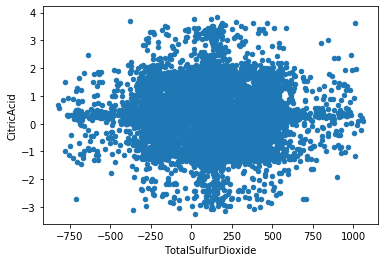

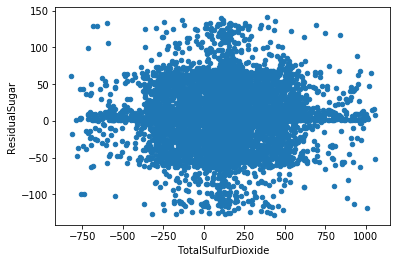

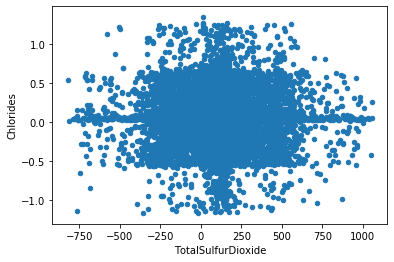

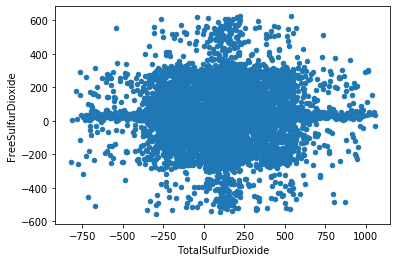

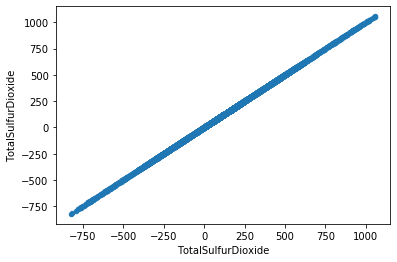

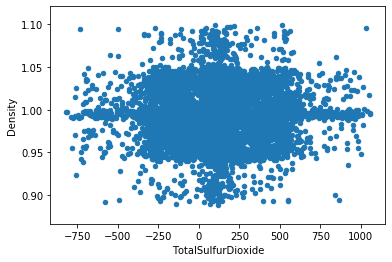

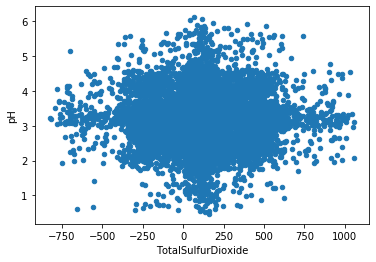

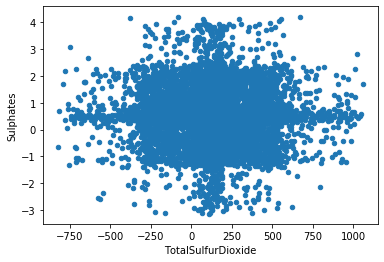

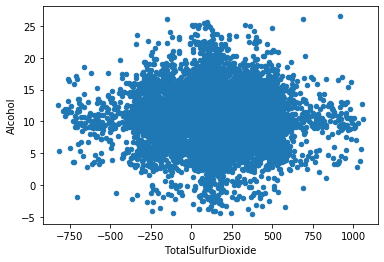

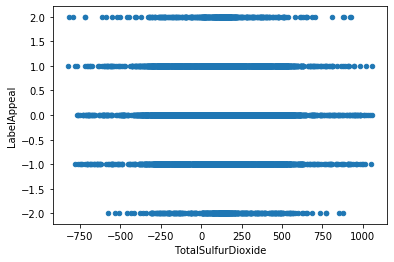

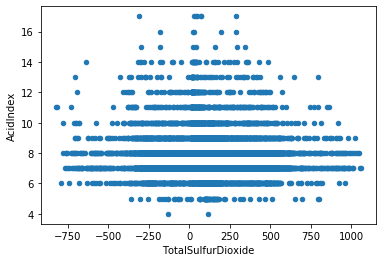

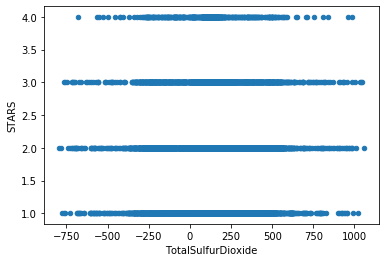

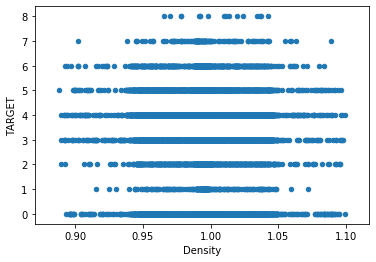

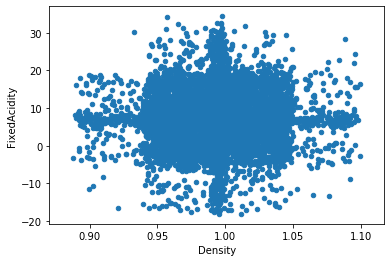

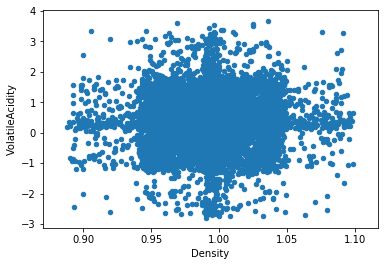

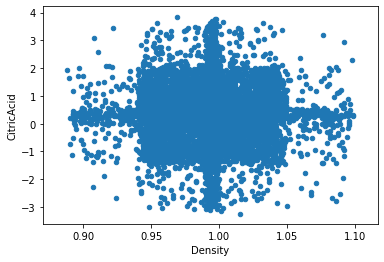

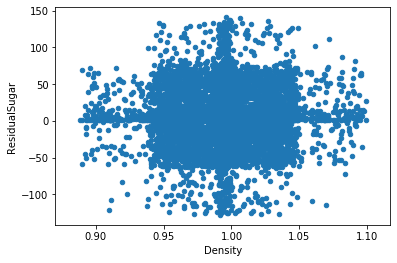

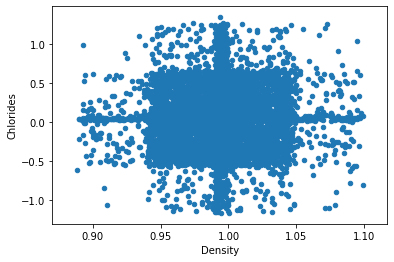

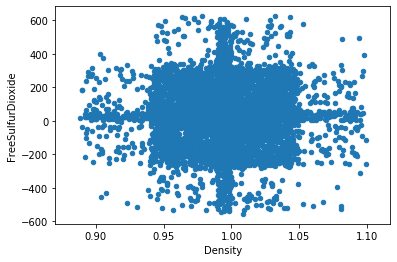

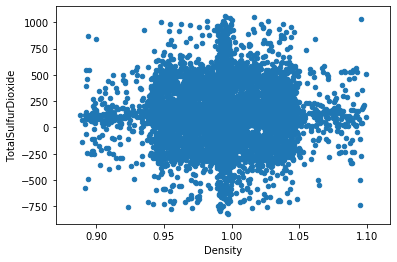

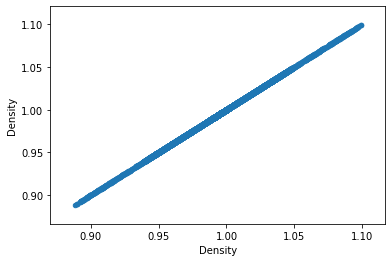

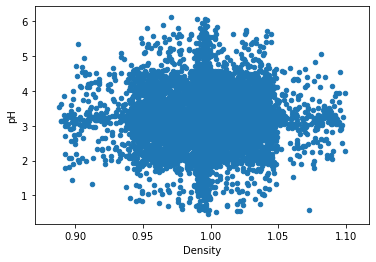

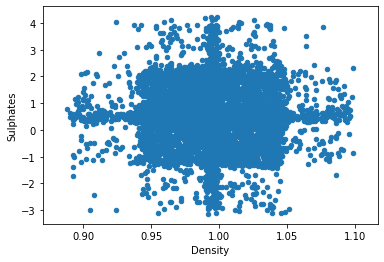

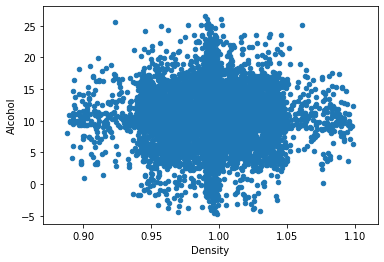

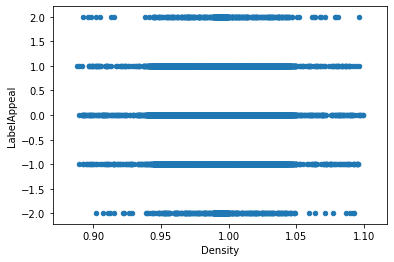

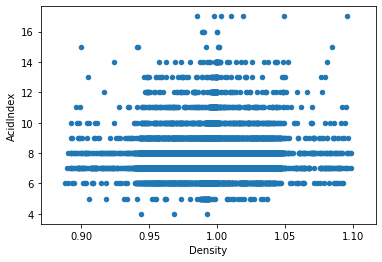

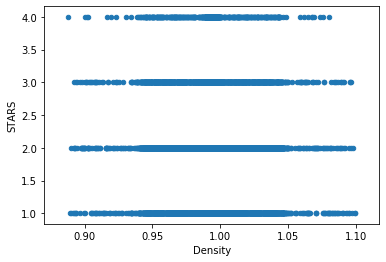

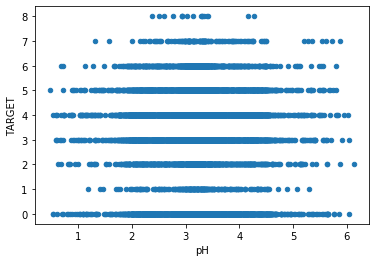

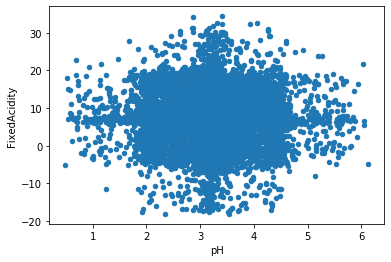

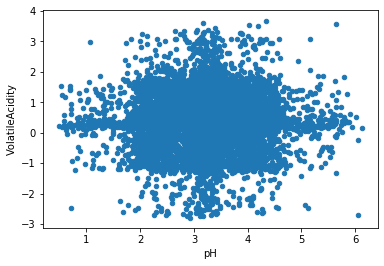

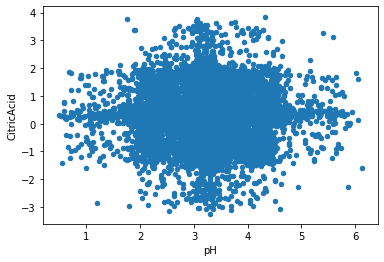

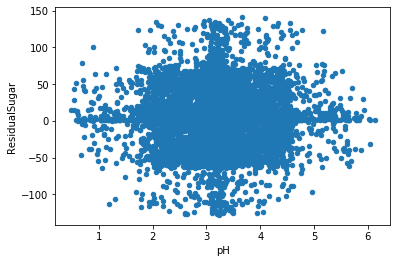

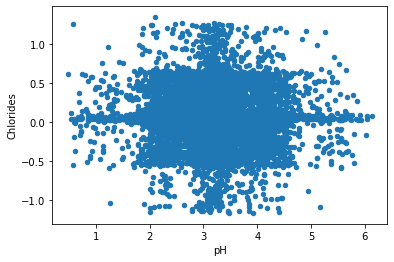

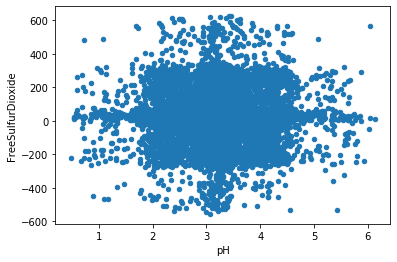

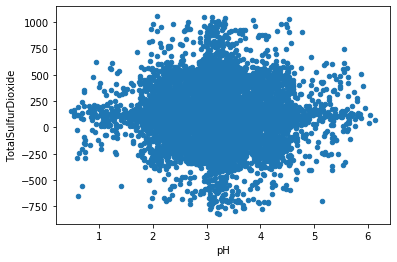

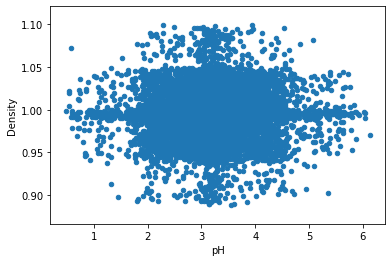

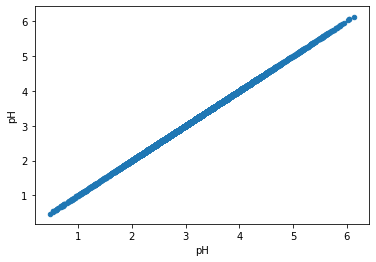

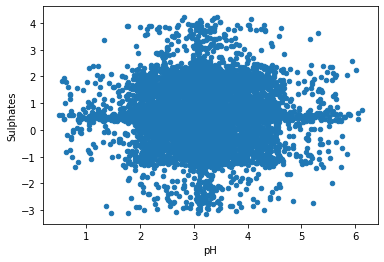

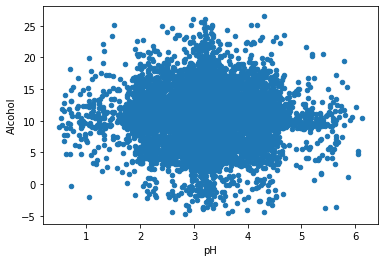

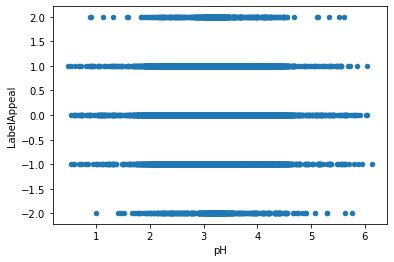

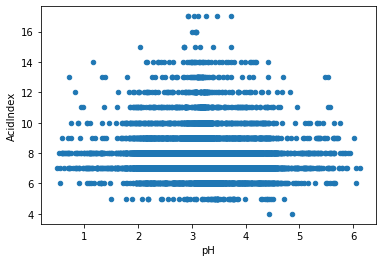

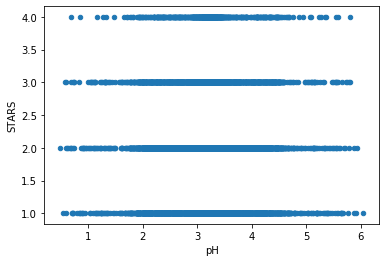

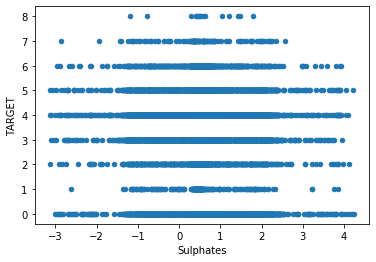

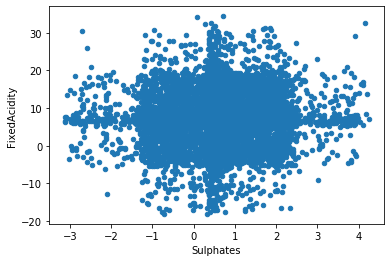

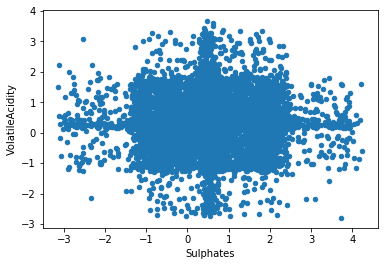

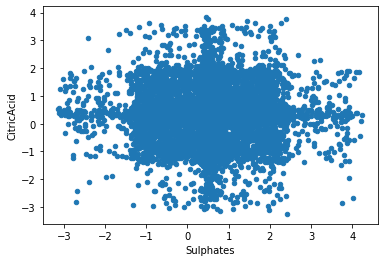

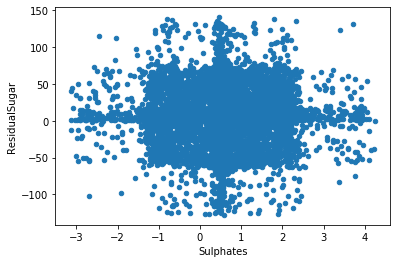

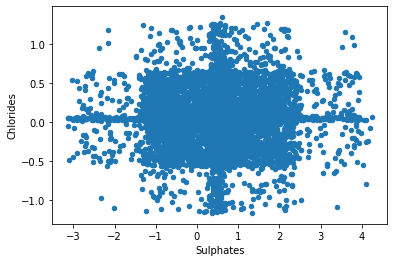

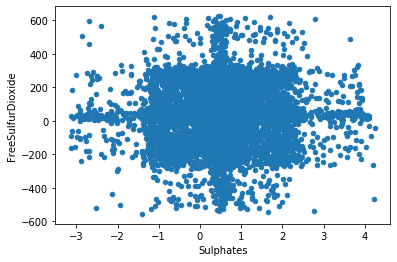

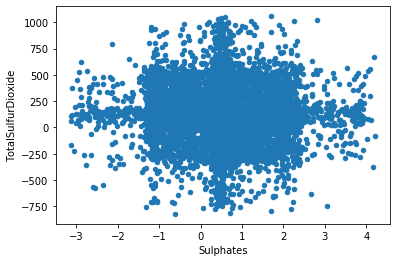

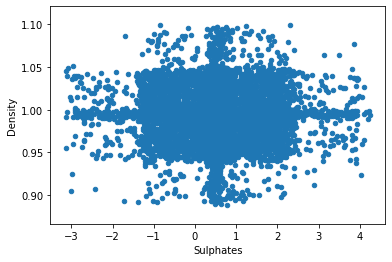

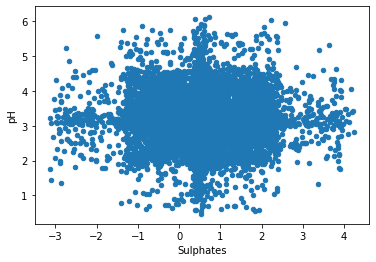

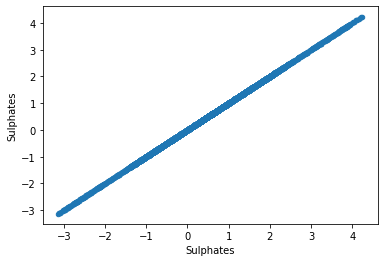

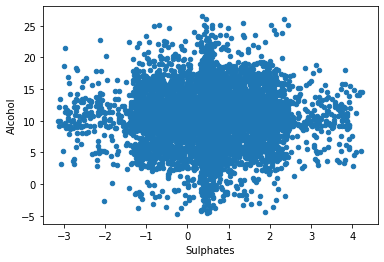

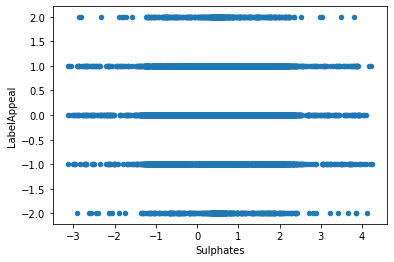

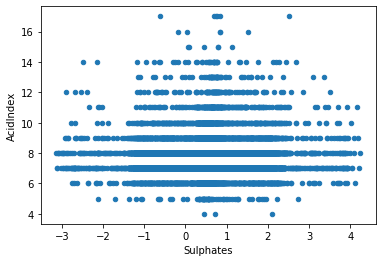

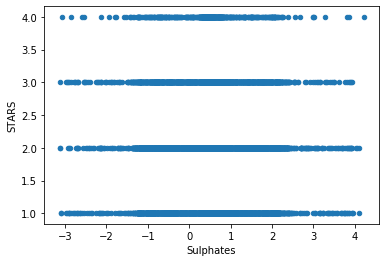

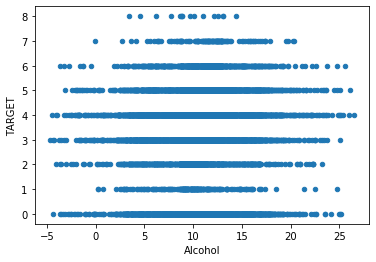

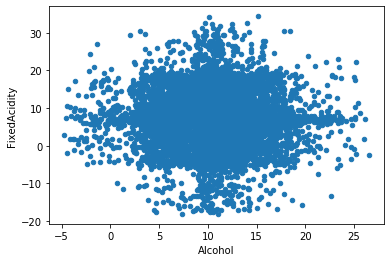

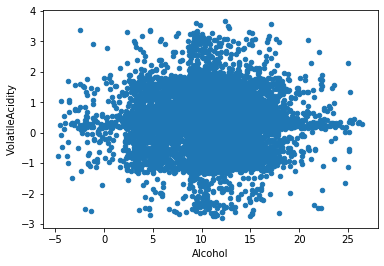

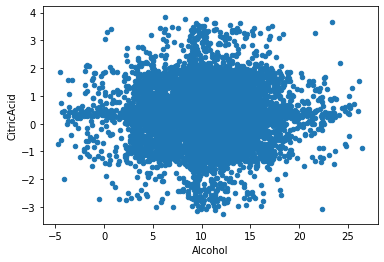

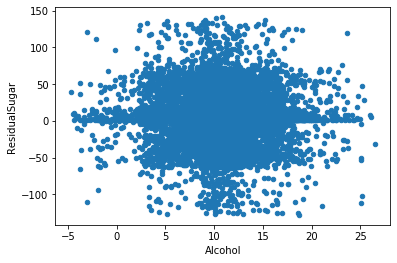

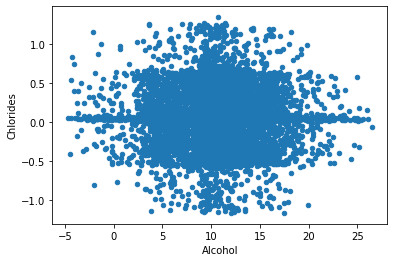

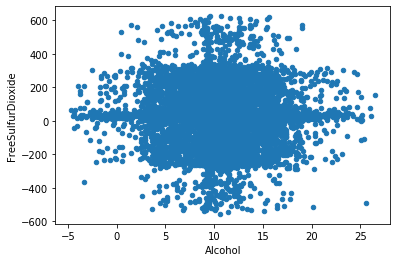

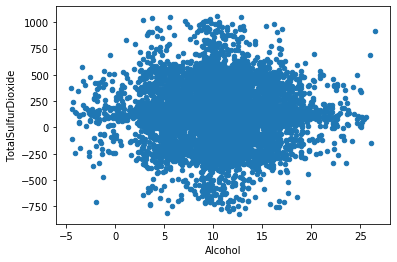

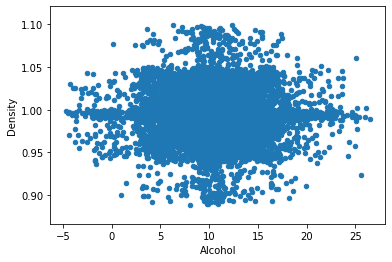

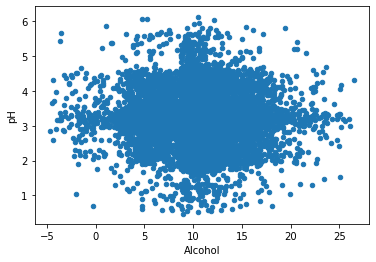

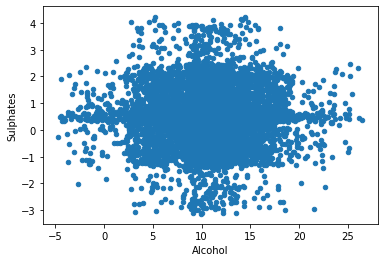

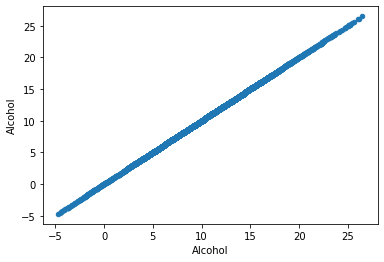

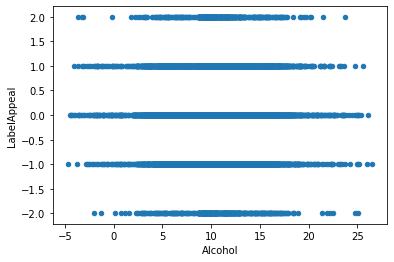

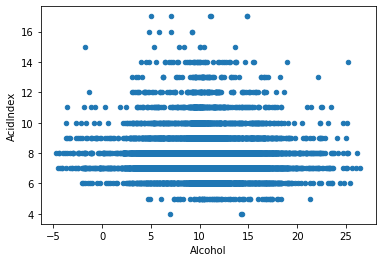

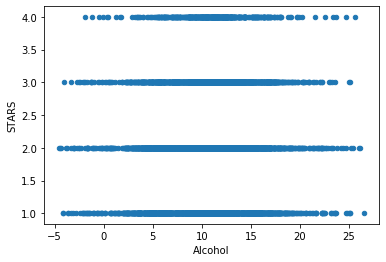

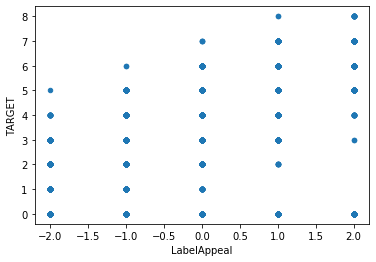

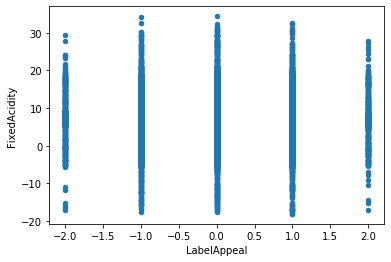

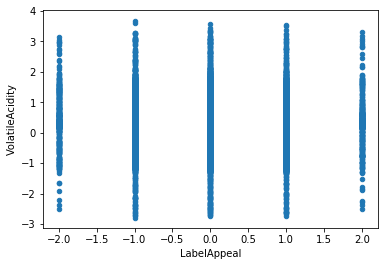

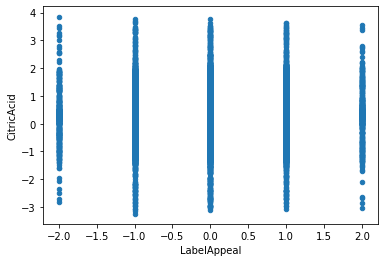

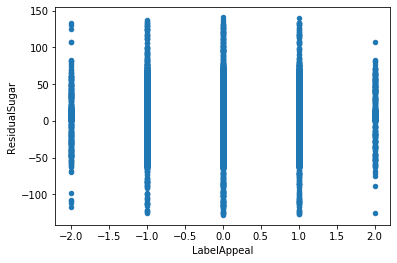

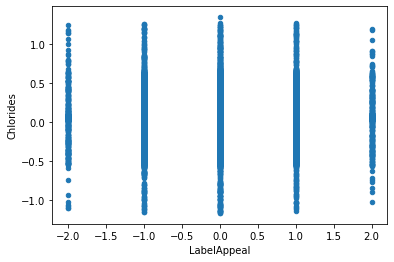

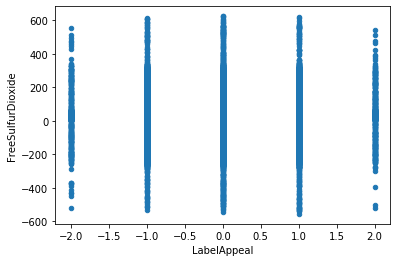

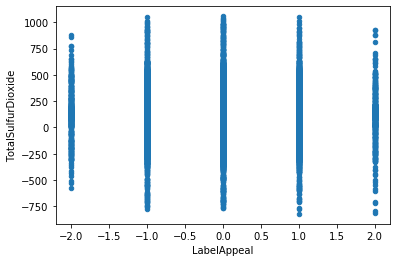

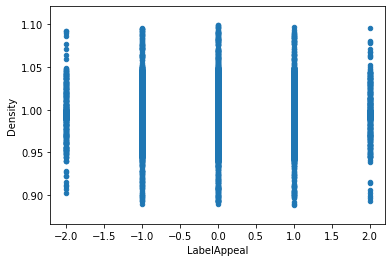

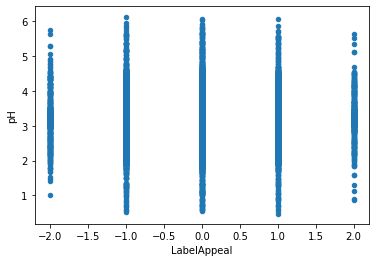

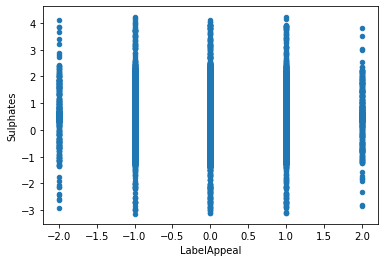

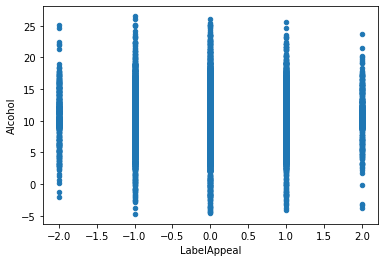

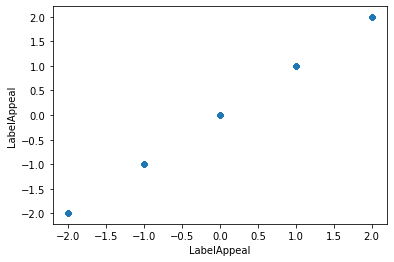

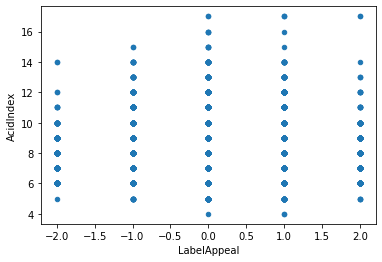

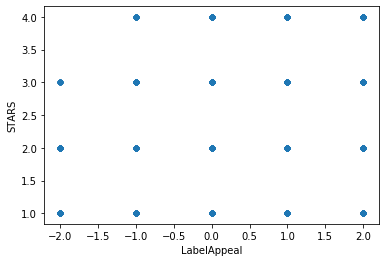

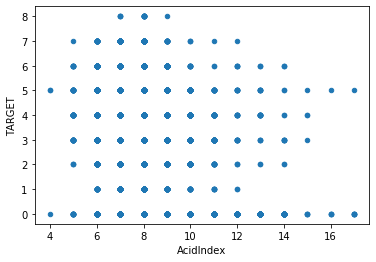

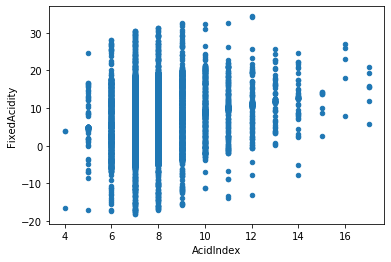

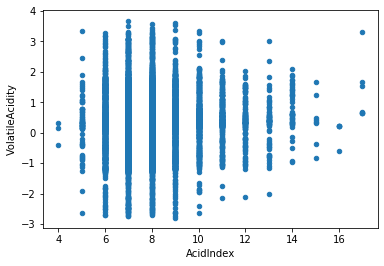

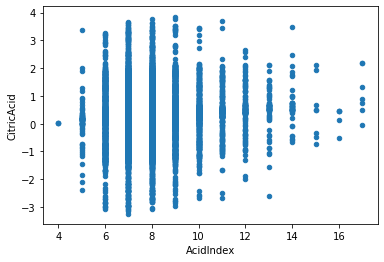

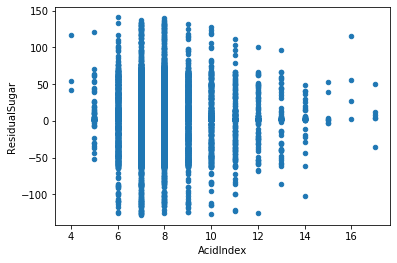

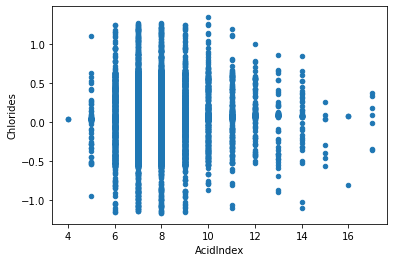

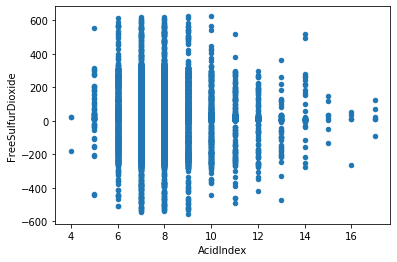

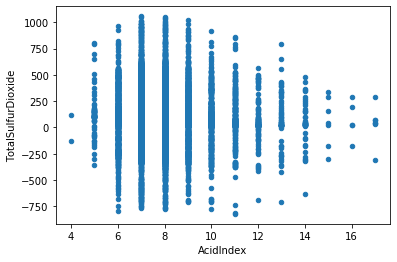

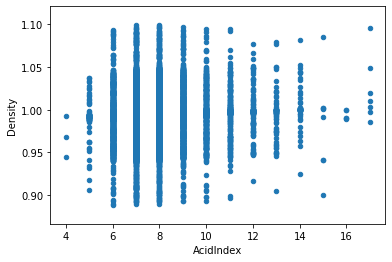

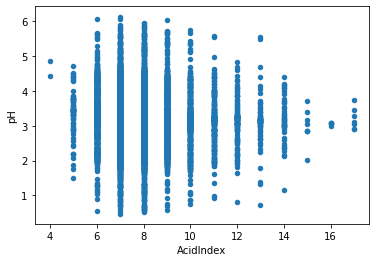

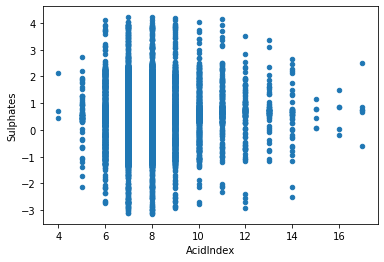

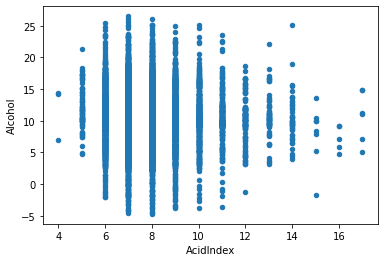

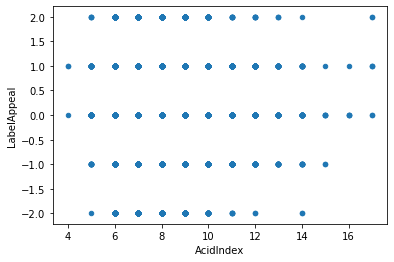

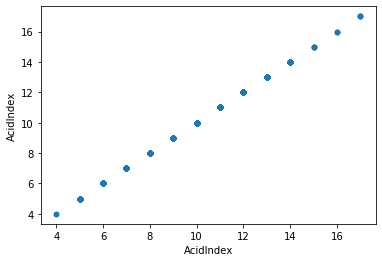

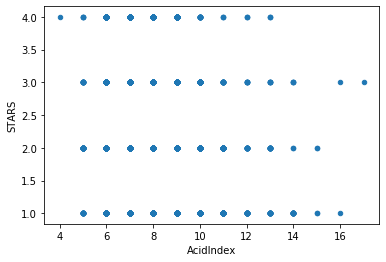

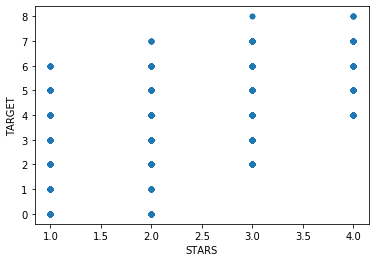

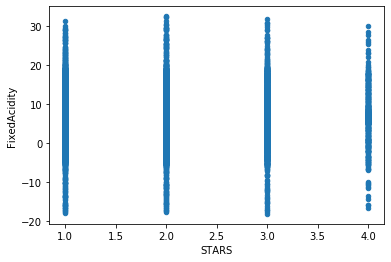

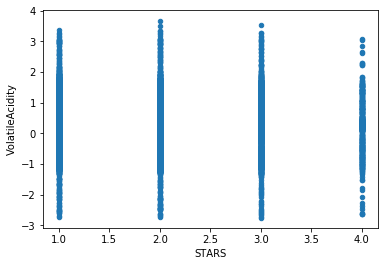

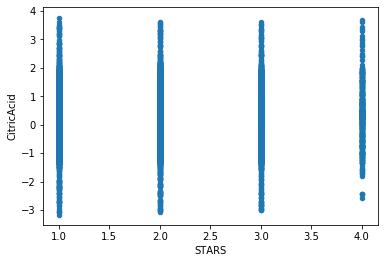

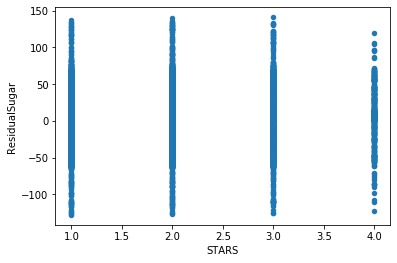

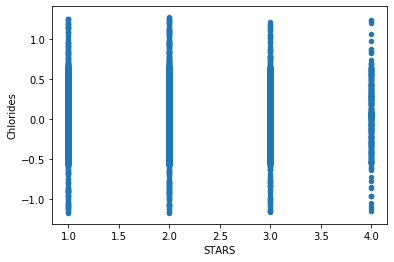

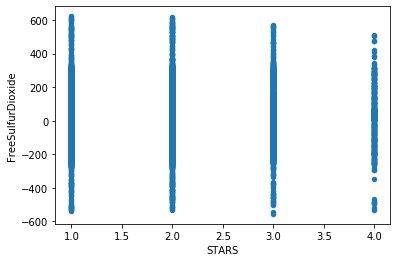

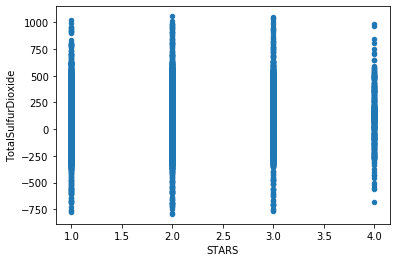

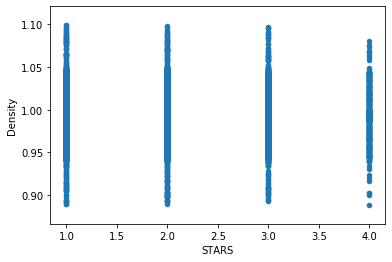

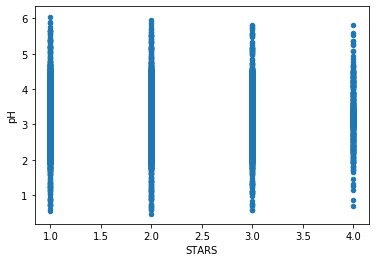

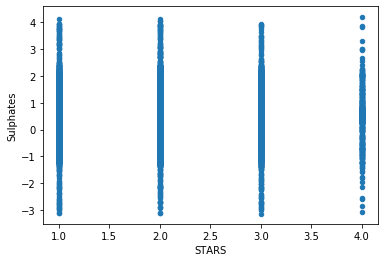

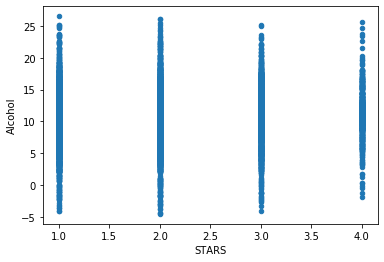

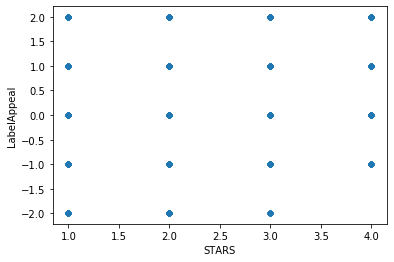

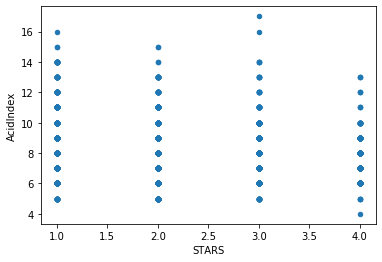

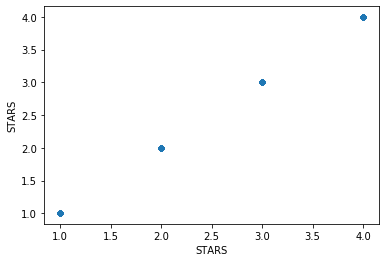

In [9]:
#scatterplot for outlier of the wine dataset
for x in df.columns[1:]:
    for y in df.columns[1:]:
        df.plot.scatter(x=x, y=y)
        plt.show()

Based on the observations from scatterplot above-
1. Star 4 wines, are medium dense.. i.e range is between .94 to 1.08. It is generally used as a measure of the conversion of sugar to alcohol.

2. They have less Acid Index compared to all other Star rated wines

3. Sulphates are also concentrated in the lower range. Very few wines have sulphates over 3.

4. pH range is also majorly between 2 to 5

5. TotalSulphurDioxide for most of the Star 4 wines ends at 700 while for others it has max limit as over 1000. Excess of TSD causes wine to have undesirable odour.

6. FreeSulphurDioxide range is also less compared to other wines. e.g. ends at 550 while others range at >600. So these wines are less pungent than others.

7. For max wines, Chlorides end at .75 while for few others it goes till 1.25 which is slightly lower than  other star wines. We can infer that these wines are coming from regions where irrigation methods are better and with less chloride ingested water

8. Star 4 wines have considerable lower residual sugar which makes them stronger in taste

9. It has less volatile acidity. Excess of volatile acids are undesirable and lead to unpleasant flavour. Hence, star 4 having less volatile acidity compared to others makes it a finer wine.

10. Slightly lower Fixed Acidity. Reducing acids significantly might lead to wines tasting flat. If you prefer a wine that is richer and rounder, you enjoy slightly less acidity.

11. CitricAcid levels for wines across all stars have almost similar range. CitricAcid gives the wine its freshness.

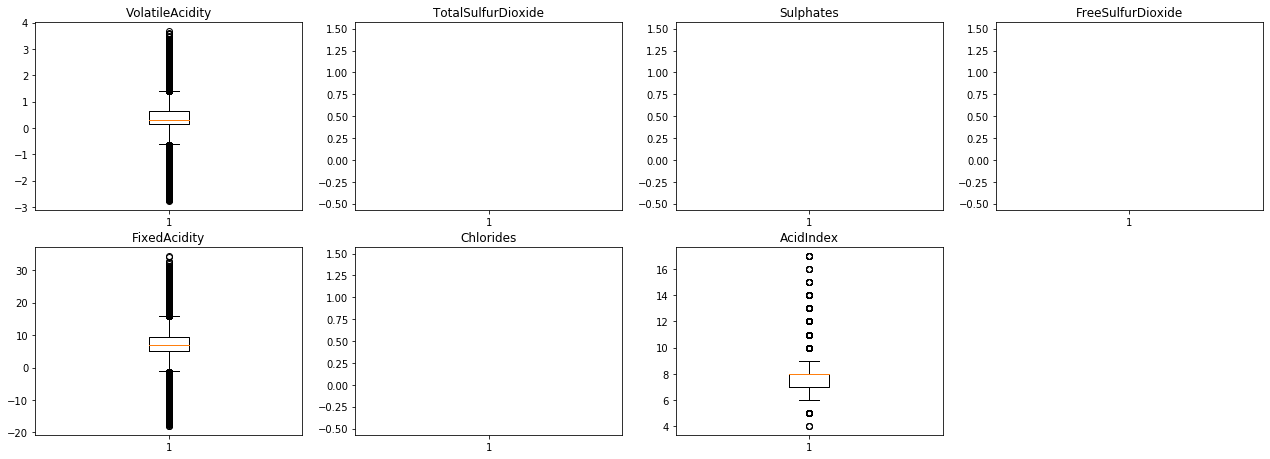

In [11]:
##Looking for outliers in the dataset
outliers_by_12_variables = ['VolatileAcidity', 'TotalSulfurDioxide','Sulphates', 'FreeSulfurDioxide', 'FixedAcidity', 'Chlorides', 'AcidIndex'] 
plt.figure(figsize=(22,20))

for i in range(0,7):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df[outliers_by_12_variables[i]])
    plt.title(outliers_by_12_variables[i])

In [12]:
#correlation between variables
corr_matrix = df.corr()
corr_list = corr_matrix.STARS.abs().sort_values(ascending=False).index[0:-1]
corr_list

Index(['STARS', 'TARGET', 'LabelAppeal', 'AcidIndex', 'Alcohol',
       'VolatileAcidity', 'Density', 'ResidualSugar', 'TotalSulfurDioxide',
       'Sulphates', 'FreeSulfurDioxide', 'FixedAcidity', 'Chlorides',
       'CitricAcid', 'pH'],
      dtype='object')

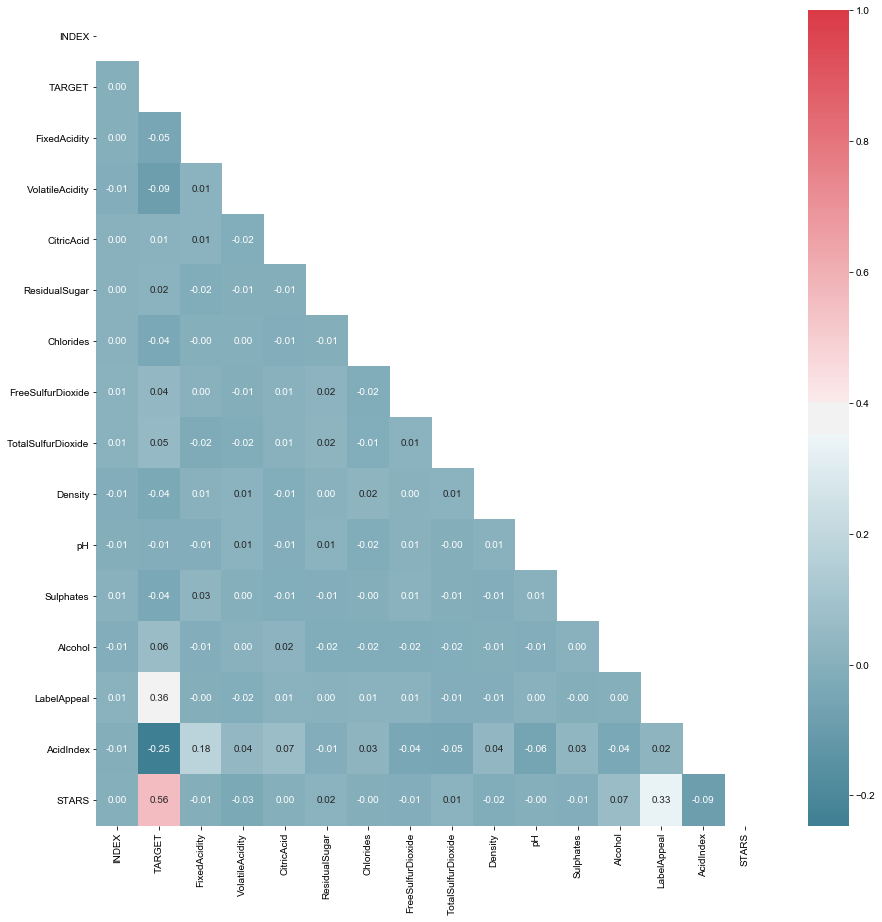

In [13]:
#Visual plot of the correlation between the qualitites of the wine
plt.figure(figsize=(15,15))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

The correlation plot suggests,

- Correlation plot does not show any strong relationship between TARGET and other variables.
- Variables TARGET and LabelAppeal have a mild positive relation, 0.36, suggesting as LabelAppeal rating increase, wine sales increase.
- Variables TARGET and STARS have a medium positive relation, 0.56, this is the only relation with a value above 0.50. It suggests as wine rating increase, sales of that wine also increase.
- Variables LabelAppeal and STARS have some week positive relation, and it may be due to rating, based on wine bottle presentation.
- Variables TARGET and AcidIndex have week negative relation, suggesting AcidIndex has a negative impact on wine sales, as AcidIndex of wine increase, wine sales decrease.
- Other variables that have week positive relation are AcidIndex and FixedAcidity.
- During correlation analysis, variables LabelAppeal and STARS are treated as quantitative variables.

In [14]:
df.corr() #to check for highly correleated variables

INDEX    TARGET  FixedAcidity  VolatileAcidity  \
INDEX               1.000000  0.001256      0.001133        -0.010224   
TARGET              0.001256  1.000000     -0.049011        -0.088793   
FixedAcidity        0.001133 -0.049011      1.000000         0.012375   
VolatileAcidity    -0.010224 -0.088793      0.012375         1.000000   
CitricAcid          0.004922  0.008685      0.014240        -0.016953   
ResidualSugar       0.003846  0.016491     -0.018855        -0.006483   
Chlorides           0.002966 -0.038263     -0.000457         0.000987   
FreeSulfurDioxide   0.009257  0.043824      0.004972        -0.007077   
TotalSulfurDioxide  0.010756  0.051478     -0.022498        -0.021080   
Density            -0.010779 -0.035518      0.006477         0.014735   
pH                 -0.005853 -0.009445     -0.008983         0.013592   
Sulphates           0.006413 -0.038850      0.030783         0.000129   
Alcohol            -0.007677  0.062062     -0.009371         0.004073   
LabelAppeal         0.011553  0.356500     -0.003366        -0.016987   
AcidIndex          -0.007097 -0.246049      0.178437         0.044642   
STARS               0.000194  0.558794     -0.006628        -0.034431   

                    CitricAcid  ResidualSugar  Chlorides  FreeSulfurDioxide  \
INDEX                 0.004922       0.003846   0.002966           0.009257   
TARGET                0.008685       0.016491  -0.038263           0.043824   
FixedAcidity          0.014240      -0.018855  -0.000457           0.004972   
VolatileAcidity      -0.016953      -0.006483   0.000987          -0.007077   
CitricAcid            1.000000      -0.006940  -0.008567           0.006428   
ResidualSugar        -0.006940       1.000000  -0.005594           0.017493   
Chlorides            -0.008567      -0.005594   1.000000          -0.020661   
FreeSulfurDioxide     0.006428       0.017493  -0.020661           1.000000   
TotalSulfurDioxide    0.006320       0.022479  -0.013994           0.013720   
Density              -0.013952       0.004101   0.022657           0.003176   
pH                   -0.008709       0.012118  -0.017605           0.006049   
Sulphates            -0.012989      -0.007723  -0.003290           0.011593   
Alcohol               0.017046      -0.019998  -0.019695          -0.018588   
LabelAppeal           0.008650       0.002320   0.010509           0.010294   
AcidIndex             0.065697      -0.009414   0.025238          -0.041717   
STARS                 0.000665       0.016741  -0.004931          -0.009082   

                    TotalSulfurDioxide   Density        pH  Sulphates  \
INDEX                         0.010756 -0.010779 -0.005853   0.006413   
TARGET                        0.051478 -0.035518 -0.009445  -0.038850   
FixedAcidity                 -0.022498  0.006477 -0.008983   0.030783   
VolatileAcidity              -0.021080  0.014735  0.013592   0.000129   
CitricAcid                    0.006320 -0.013952 -0.008709  -0.012989   
ResidualSugar                 0.022479  0.004101  0.012118  -0.007723   
Chlorides                    -0.013994  0.022657 -0.017605  -0.003290   
FreeSulfurDioxide             0.013720  0.003176  0.006049   0.011593   
TotalSulfurDioxide            1.000000  0.012816 -0.004343  -0.007133   
Density                       0.012816  1.000000  0.005768  -0.009059   
pH                           -0.004343  0.005768  1.000000   0.005475   
Sulphates                    -0.007133 -0.009059  0.005475   1.000000   
Alcohol                      -0.015957 -0.007215 -0.011548   0.004741   
LabelAppeal                  -0.009747 -0.009370  0.004138  -0.003888   
AcidIndex                    -0.049311  0.040413 -0.058676   0.034449   
STARS                         0.013929 -0.018284 -0.000488  -0.012306   

                     Alcohol  LabelAppeal  AcidIndex     STARS  
INDEX              -0.007677     0.011553  -0.007097  0.000194  
TARGET              0.062062     0.356500  -0.246049  0.558794  


In [17]:
######Running PCA to understand how the data is spread within the dataset ##########

In [65]:
#Filtering the dataset based on the availability of the STARS data to run PCA
df2 = df[df['STARS'].notnull()]
df2.info()
df_index=df2['INDEX'] #saving the INDEX column for use in PCA later

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9436 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               9436 non-null   int64  
 1   TARGET              9436 non-null   int64  
 2   FixedAcidity        9436 non-null   float64
 3   VolatileAcidity     9436 non-null   float64
 4   CitricAcid          9436 non-null   float64
 5   ResidualSugar       8984 non-null   float64
 6   Chlorides           8969 non-null   float64
 7   FreeSulfurDioxide   8979 non-null   float64
 8   TotalSulfurDioxide  8942 non-null   float64
 9   Density             9436 non-null   float64
 10  pH                  9154 non-null   float64
 11  Sulphates           8564 non-null   float64
 12  Alcohol             8963 non-null   float64
 13  LabelAppeal         9436 non-null   int64  
 14  AcidIndex           9436 non-null   int64  
 15  STARS               9436 non-null   float64
dtypes: fl

In [51]:
imputer = KNNImputer(n_neighbors=2)  #impute missing values
df2.iloc[:,0:]=imputer.fit_transform(df2.iloc[:,0:]) #replace df with imputed missing values

In [52]:
#Trying to understand if we have a clustering based on chemical properties alone
#and not based on STARS or TARGET
cols =['TARGET','STARS','INDEX']

In [53]:
df2=df2.drop(columns=cols)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9436 entries, 0 to 12794
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FixedAcidity        9436 non-null   float64
 1   VolatileAcidity     9436 non-null   float64
 2   CitricAcid          9436 non-null   float64
 3   ResidualSugar       9436 non-null   float64
 4   Chlorides           9436 non-null   float64
 5   FreeSulfurDioxide   9436 non-null   float64
 6   TotalSulfurDioxide  9436 non-null   float64
 7   Density             9436 non-null   float64
 8   pH                  9436 non-null   float64
 9   Sulphates           9436 non-null   float64
 10  Alcohol             9436 non-null   float64
 11  LabelAppeal         9436 non-null   float64
 12  AcidIndex           9436 non-null   float64
dtypes: float64(13)
memory usage: 1.0 MB


In [54]:
#Running PCA using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
pcs = PCA(whiten=True)
scores = pd.DataFrame(pcs.fit_transform(scaler.fit_transform(df2.iloc[:,0:])),
                      columns=['PC{}'.format(i) for i in range(1, len(df2.iloc[:,0:].columns) + 1)]) 
scores.head(500)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.075101 -1.361251  1.045080  1.397316  1.610688 -0.861331 -0.426487   
1    1.205093 -0.657532  0.050454  0.535667  1.809610 -1.204373  0.548823   
2    1.220182  0.196462 -0.220744  0.541511  0.747665 -1.202459  1.521007   
3    1.204782 -1.094248 -0.513512  0.652012  0.336674 -0.506534  0.571242   
4    0.072641  0.075004  0.100443  0.033786  1.241046 -1.736009  0.627957   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.041275 -0.634782 -1.365429 -0.145354 -0.376304  0.560328  0.406664   
496  1.213264 -0.395504 -0.583233  1.181088  1.344262 -0.364897  0.491568   
497  0.054259 -0.443541 -0.239945  1.246483  0.141795 -0.997595 -1.198734   
498  0.066267  0.369874  2.424976 -0.306205  1.484910 -0.318963 -1.364934   
499  0.051239 -0.874127 -0.773867 -0.376153  0.321192  0.798278  1.061936   

          PC8       PC9      PC10      PC11      PC12      PC13  
0    1.183453  1.165788  0.401412 -0.434550  0.080888  0.640755  
1    0.725308 -1.735802 -0.928504 -0.770946 -0.258128 -0.318783  
2    1.353650 -0.052636  2.629312 -0.999574  2.735078  0.665840  
3   -0.563709  0.350251  0.135332 -1.078504 -1.941899 -1.667528  
4   -1.437612  0.177270 -0.173154 -1.129655  0.151714  1.294895  
..        ...       ...       ...       ...       ...       ...  
495  0.582332  0.275724  0.016756  0.323467  0.556184  0.977029  
496  0.598401  1.230315 -0.717938 -1.874748 -0.913890  0.962380  
497  0.537815  0.419562 -0.491470 -1.058045  0.252772  0.151887  
498  0.549672 -1.024099 -0.086598  0.567302 -0.571433 -0.095218  
499 -0.291727  0.969191 -1.929998 -0.440663 -1.920949  0.017584  

[500 rows x 13 columns]

In [55]:
pcsSummary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance %
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = scores.columns
pcsSummary

PC1       PC2       PC3       PC4       PC5  \
Explained Variance        0.048144  0.016755  0.016485  0.016230  0.015671   
Explained Variance Ratio  0.214944  0.074805  0.073600  0.072460  0.069966   
Cumulative Proportion     0.214944  0.289749  0.363349  0.435809  0.505775   

                               PC6       PC7       PC8       PC9      PC10  \
Explained Variance        0.015591  0.015158  0.014831  0.014653  0.014474   
Explained Variance Ratio  0.069606  0.067675  0.066213  0.065419  0.064620   
Cumulative Proportion     0.575381  0.643056  0.709270  0.774689  0.839309   

                              PC11      PC12      PC13  
Explained Variance        0.014429  0.013919  0.007644  
Explained Variance Ratio  0.064422  0.062142  0.034127  
Cumulative Proportion     0.903730  0.965873  1.000000

Text(0.5, 1.0, 'Explained Variance by Component')

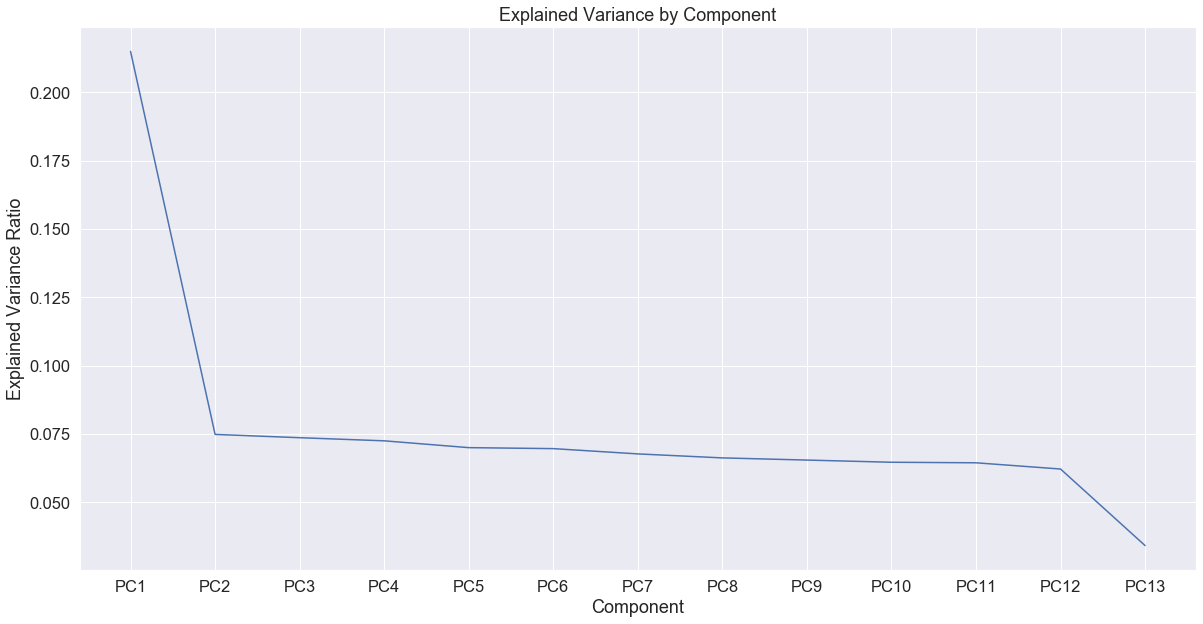

In [56]:
#scree plot between components and Explained variance ratio
plt.figure(figsize=(20,10))
plt.plot(pcsSummary[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

In [57]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns, 
                                index=df2.iloc[:,:].columns)
pcsComponents_df

PC1       PC2       PC3       PC4       PC5  \
FixedAcidity        0.001232  0.103228 -0.701450 -0.183716  0.013292   
VolatileAcidity     0.015685  0.168921 -0.067098 -0.024090  0.231464   
CitricAcid         -0.012136 -0.205220 -0.209477 -0.399435 -0.236477   
ResidualSugar      -0.004473 -0.123310  0.163854  0.454941 -0.153102   
Chlorides          -0.003786  0.830018  0.127427 -0.007405 -0.509400   
FreeSulfurDioxide  -0.011968 -0.241332 -0.375896  0.469886 -0.440072   
TotalSulfurDioxide  0.003096 -0.048297  0.070271  0.382609 -0.012553   
Density             0.007777  0.367150 -0.303027  0.379266  0.597311   
pH                 -0.005956 -0.091058  0.171070  0.131409  0.108112   
Sulphates          -0.002480 -0.035030 -0.325080  0.139834 -0.180610   
Alcohol             0.000694 -0.078592  0.065213 -0.215190  0.109363   
LabelAppeal        -0.999635  0.008455  0.002935 -0.000060  0.018801   
AcidIndex          -0.006721  0.058478 -0.198078 -0.070292  0.013214   

                         PC6       PC7       PC8       PC9      PC10  \
FixedAcidity       -0.280372 -0.332077 -0.008529  0.300172 -0.222660   
VolatileAcidity    -0.267901  0.025787  0.333546  0.163126  0.829889   
CitricAcid          0.565582 -0.414745 -0.028178 -0.272207  0.319723   
ResidualSugar      -0.224229 -0.633641  0.144618 -0.139348  0.066570   
Chlorides           0.060587 -0.046133 -0.021227 -0.086988  0.030738   
FreeSulfurDioxide   0.137026  0.340143  0.414524 -0.118394  0.035998   
TotalSulfurDioxide  0.396161 -0.092847 -0.447666  0.605149  0.226825   
Density             0.373065 -0.038994  0.015479 -0.342335 -0.071454   
pH                 -0.234345 -0.295084 -0.168262 -0.342731  0.011975   
Sulphates          -0.320466  0.212718 -0.676854 -0.298479  0.258045   
Alcohol             0.056171  0.212314 -0.084436 -0.271614  0.171431   
LabelAppeal        -0.005860  0.005433  0.001248  0.009965  0.007514   
AcidIndex          -0.009280 -0.100740  0.021583  0.066050  0.008967   

                        PC11      PC12      PC13  
FixedAcidity        0.021895  0.310018 -0.195333  
VolatileAcidity     0.094692 -0.040541 -0.054187  
CitricAcid          0.070503 -0.131053 -0.085041  
ResidualSugar      -0.479962  0.024275 -0.004441  
Chlorides           0.048339  0.134771 -0.003683  
FreeSulfurDioxide   0.179338  0.175924  0.033663  
TotalSulfurDioxide  0.073182  0.237629  0.026940  
Density            -0.060089 -0.058984 -0.048642  
pH                  0.736086  0.307256  0.096491  
Sulphates          -0.136571 -0.244835 -0.023767  
Alcohol            -0.386855  0.784733  0.085537  
LabelAppeal        -0.003812 -0.001302 -0.007664  
AcidIndex          -0.040117 -0.072553  0.964452

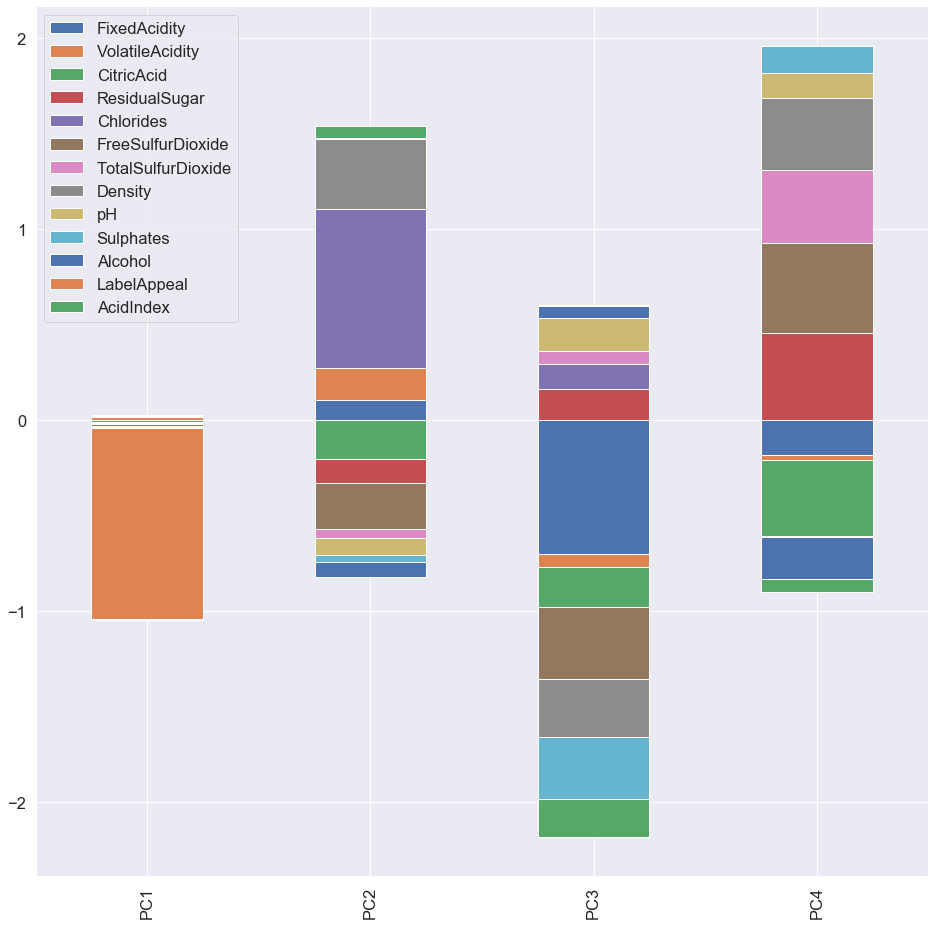

In [58]:
pcsComponents_df[['PC1','PC2','PC3','PC4']].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


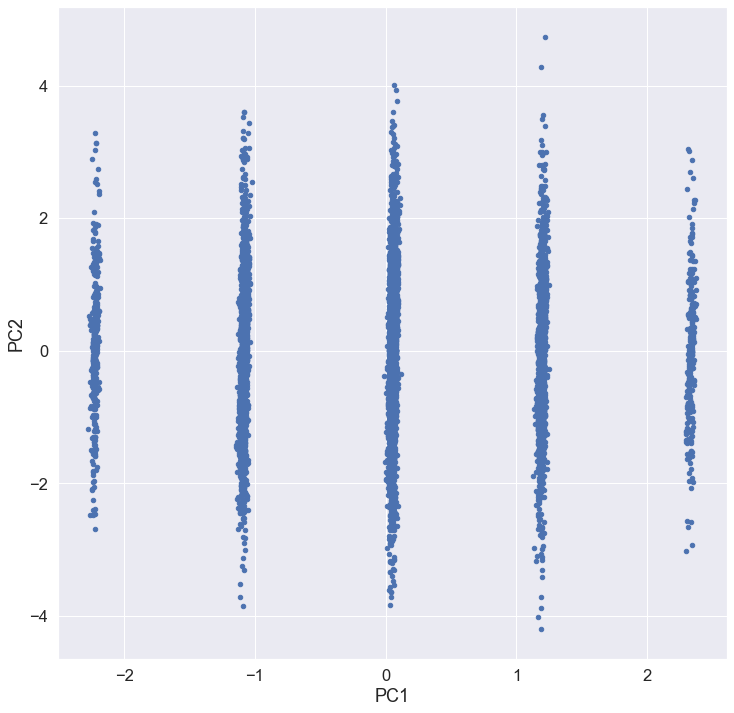

In [59]:
#plot first 2 components to see if there are any natural clusterings in the data spread
scores.plot.scatter(x='PC1', y='PC2',figsize=(12, 12))

In [60]:
cols=['PC1', 'PC2'] 

silhouette=[] 
inertia=[]
clusters=[]
for i in range(2,40):  #2=2 clusters, use enough to where we see declining silhouette and/or flattening of inertia
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scores[cols])
    silhouette.append(silhouette_score(scores[cols],kmeans.labels_)) #silhoustte
    inertia.append(kmeans.inertia_)
    clusters.append(i)

In [61]:
#adding silhouette and inertia to the dataframe
kmeans_eval=pd.DataFrame({'silhouette_score': silhouette,'inertia': inertia,},index=clusters)

Text(0.5, 1.0, 'Scree Plot - Number of clusters vs Inertia')

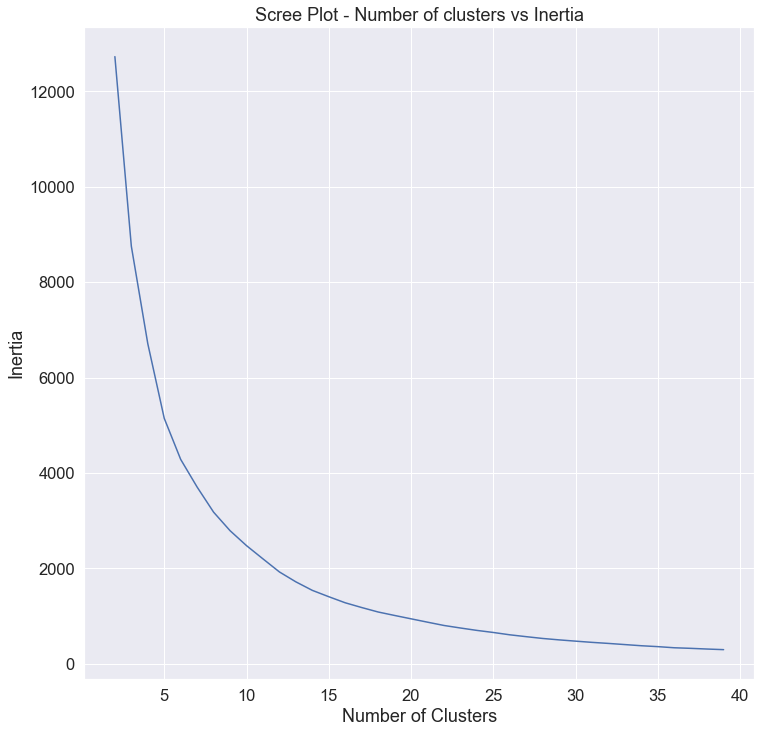

In [62]:
kmeans_eval['inertia'].plot(figsize=(12, 12))#use elbow method of finding # of components to cluster
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot - Number of clusters vs Inertia')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


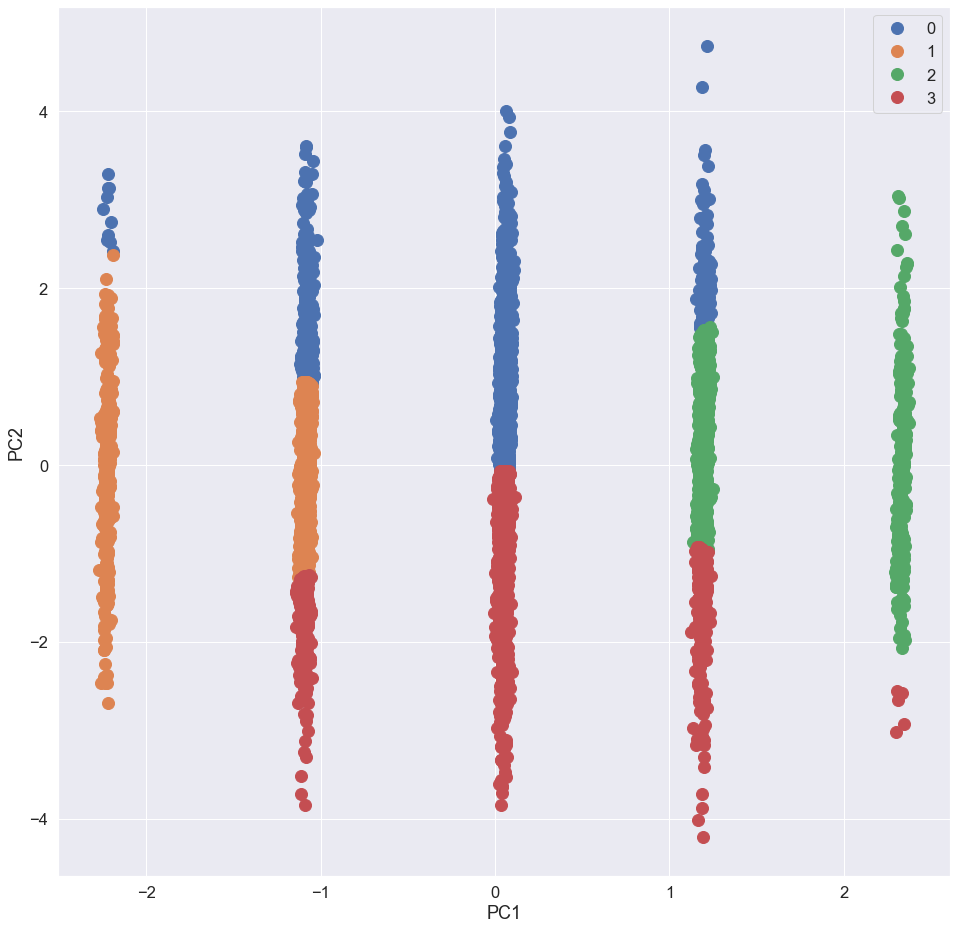

In [68]:
#Running kmean algorithm on PC1 and PC2 with 3 clusters
kmeans= KMeans(n_clusters=4).fit(scores[cols]) #kmeans number of clusters is subjective (unsupervised)
scores['cluster']=kmeans.labels_   #kmeans
groups = scores.groupby('cluster') #grouping subplots
scores['INDEX']=df_index 
ax = scores.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))
points = scores[['PC1','PC2']]

#texts = [] #adjust text
#for _, (x, y, s) in points.iterrows():#adjust text
#         texts.append(ax.text(x, y, s))#adjust text
#adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))#adjust text


for name, group in groups:  #grouping subplots
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() #grouping subplots

In [70]:
##Analysing the clusters for patterns based on the STARS column
is_cluster0 =  scores['cluster']==0
cluster0 = scores[is_cluster0]
#cluster 0 details
cluster0_details = pd.merge(df_wine,
                 cluster0[['INDEX']],
                 on='INDEX')
cluster0_details['STARS'].value_counts()

2.0    737
1.0    663
3.0    494
4.0    130
Name: STARS, dtype: int64

In [71]:
is_cluster1 =  scores['cluster']==1
cluster1 = scores[is_cluster1]
#cluster 1 details
cluster1_details = pd.merge(df_wine,
                 cluster1[['INDEX']],
                 on='INDEX')
cluster1_details['STARS'].value_counts()

2.0    624
1.0    505
3.0    374
4.0    120
Name: STARS, dtype: int64

In [72]:
is_cluster2 =  scores['cluster']==2
cluster2 = scores[is_cluster2]
#cluster 2 details
cluster2_details = pd.merge(df_wine,
                 cluster2[['INDEX']],
                 on='INDEX')
cluster2_details['STARS'].value_counts()

2.0    557
1.0    501
3.0    346
4.0     90
Name: STARS, dtype: int64

In [73]:
is_cluster3 =  scores['cluster']==3
cluster3 = scores[is_cluster3]
#cluster 3 details
cluster3_details = pd.merge(df_wine,
                 cluster3[['INDEX']],
                 on='INDEX')
cluster3_details['STARS'].value_counts()

2.0    710
1.0    613
3.0    431
4.0    111
Name: STARS, dtype: int64

The objective of the cluster analysis was to see if STARS was a major player when it comes to clustering the wines.
We do not see a clear cut clustering based on the STARS. We can see all rated wines in all the clusters. So it is safe to say that PCA/cluster analysis cannot be used to find the missing STARS data. 

However we can use the results of PCA in the later stages to perform Feature engineering to improve the performance of our models.


In [74]:
### Understanding the relationship between STARS abd TARGET.

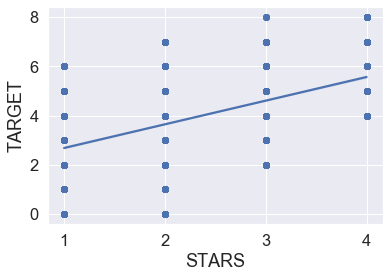

In [75]:
import seaborn as sns
#correlation between STARS AND TARGET
sns.regplot(x=df_wine.STARS, y=df_wine.TARGET)
plt.show()

We can see that STARS and TARGET seem to have some a direct correlation. In order to understand this relationship better we need to investigate further.

In [90]:
## getting the total sales based on each wine rating 
isStar1 = df_wine['STARS']==1
star1 = df_wine[isStar1]
star1_sales = star1.TARGET.sum()

isStar2 = df_wine['STARS']==2
star2 = df_wine[isStar2]
star2_sales = star2.TARGET.sum()

isStar3 = df_wine['STARS']==3
star3 = df_wine[isStar3]
star3_sales = star3.TARGET.sum()

isStar4 = df_wine['STARS']==4
star4 = df_wine[isStar4]
star4_sales = star4.TARGET.sum()

#total sales
total_sales=[star1_sales,star2_sales,star3_sales,star4_sales]

#average sales based on each wine type
avgSales_perUnit=[star1_sales/len(star1),star2_sales/len(star2),star3_sales/len(star3),star4_sales/len(star4)]

In [78]:
col={'Total Sales':total_sales}
stars=['1-star','2-star','3-star','4-star']
df_totalSales=pd.DataFrame(data=col,index=stars)
df_totalSales

Total Sales
1-star         7850
2-star        13560
3-star        10053
4-star         3318

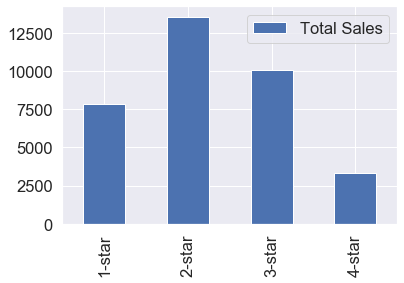

In [79]:
df_totalSales.plot(kind='bar')

In [81]:
#Number of wines in each category
wines_perType =[len(star1),len(star2),len(star3),len(star4)]

In [82]:
col = {'Total no.of wine types': wines_perType}
df_wines_perType=pd.DataFrame(data=col,index=stars)
df_wines_perType

Total no.of wine types
1-star                    3042
2-star                    3570
3-star                    2212
4-star                     612

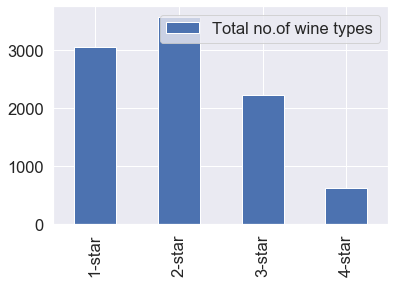

In [83]:
df_wines_perType.plot(kind='bar')

In [91]:
col={'Sales Per unit':avgSales_perUnit}
df_avgsalesPerUnit=pd.DataFrame(data=col,index=stars)
df_avgsalesPerUnit

Sales Per unit
1-star        2.580539
2-star        3.798319
3-star        4.544756
4-star        5.421569

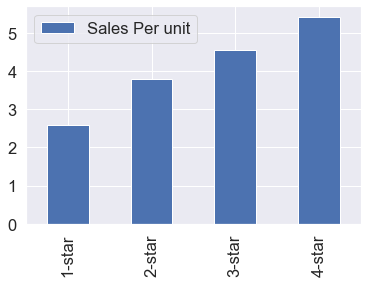

In [92]:
df_avgsalesPerUnit.plot(kind='bar')

Analysis from TARGET and STARS: We are trying to identify what STARS mean for Sales

Even though total number of units of 4 star bottles sold is the lowest - 3318, there are only 612 types of wines in that category.Therefore the each 4 star wine sold approximate 5 cases.

Similarly even though the total number of 2-star wines sold is 13560, there are about 3570 offerings in that category. This amounts to roughly 3.798319 ~ 4 cases being sold per offering.

----Recommendation to the manufacturer would ultimately be to concentrate on the 3 and 4 star wines. Maximize the offerings in these category, if the target is to maximize sales in high end restaurants.

In [93]:
#### PCA to understand TARGET column better after imputing STARS.

In [94]:
df_final =pd.read_csv('/Users/ushapraveen/Documents/MSBA/BAN620/final_project/df_final.csv') 

In [95]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12795 non-null  float64
 6   Chlorides           12795 non-null  float64
 7   FreeSulfurDioxide   12795 non-null  float64
 8   TotalSulfurDioxide  12795 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12795 non-null  float64
 11  Sulphates           12795 non-null  float64
 12  Alcohol             12795 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  float64
 15  STARS               12795 non-null  float64
dtypes: f

In [96]:
df_final.columns

Index(['Unnamed: 0', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

In [97]:
#columns of interest
cols = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex']

In [98]:
df_PCA = df_final[cols]

In [99]:
#Running PCA using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
pcs = PCA(whiten=True)
scores = pd.DataFrame(pcs.fit_transform(scaler.fit_transform(df_PCA.iloc[:,0:])),
                      columns=['PC{}'.format(i) for i in range(1, len(df_PCA.iloc[:,0:].columns) + 1)]) 
scores.head(500)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.038499  1.204677 -1.281473  1.091662  0.562782  0.173155 -0.915468   
1   -1.143748  0.194256 -0.986322  0.277664  0.255479  1.320086 -0.319238   
2   -1.103566 -0.410409  0.985450 -0.266937 -0.047682 -2.624682 -1.491140   
3   -1.157833 -0.130200 -1.108021  0.374147 -0.796709 -0.002679  1.226348   
4    0.070413 -0.730400  0.622093 -0.302672  1.034344 -0.682353  1.035293   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.064052 -0.504985  1.229852  0.046337 -0.011263  0.040592 -0.348899   
496 -1.116228  0.320638 -0.867623  0.378810  0.703437  0.427014 -0.612013   
497  0.011698  2.120323  0.151750 -0.050305 -0.376488  0.119331 -0.188918   
498  0.047338  0.212767  1.646945  0.213522 -0.873626 -0.327485 -0.513813   
499 -0.035411  0.595730 -0.974688  0.356137 -0.896272 -0.512726 -0.403076   

          PC8       PC9      PC10      PC11      PC12      PC13  
0    0.845019 -0.781057 -0.287763 -0.044311  0.028233  0.393583  
1   -0.395674 -0.588220  1.268952  1.265084  0.256967 -0.276811  
2    2.358022 -0.784434  2.953100  0.286724 -0.261572  0.335553  
3   -0.886551 -1.025040 -1.314425 -0.158815 -1.311388 -1.594410  
4   -0.967943 -0.448990  0.809608  0.114088 -0.237287  0.887245  
..        ...       ...       ...       ...       ...       ...  
495 -0.448059  1.251949  0.426969  0.017377 -0.220636  0.800748  
496 -0.536678  0.737703 -0.504634  0.952277 -1.959554  0.436506  
497 -0.717508  1.214678 -0.153873  0.107200 -0.021227 -0.008493  
498 -0.618206 -0.864718 -0.659234  0.453572  1.486838  0.066804  
499  0.207524  0.204114 -1.666092  0.074804 -1.778951 -0.305799  

[500 rows x 13 columns]

In [100]:
pcsSummary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance %
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = scores.columns
pcsSummary

PC1       PC2       PC3       PC4       PC5  \
Explained Variance        0.049698  0.030733  0.029636  0.029069  0.024717   
Explained Variance Ratio  0.159442  0.098596  0.095078  0.093259  0.079296   
Cumulative Proportion     0.159442  0.258037  0.353115  0.446374  0.525671   

                               PC6       PC7       PC8       PC9      PC10  \
Explained Variance        0.023921  0.022396  0.022226  0.021505  0.018157   
Explained Variance Ratio  0.076743  0.071850  0.071305  0.068991  0.058250   
Cumulative Proportion     0.602414  0.674264  0.745569  0.814561  0.872810   

                              PC11      PC12      PC13  
Explained Variance        0.015795  0.014383  0.009468  
Explained Variance Ratio  0.050673  0.046142  0.030374  
Cumulative Proportion     0.923483  0.969626  1.000000

Text(0.5, 1.0, 'Explained Variance by Component')

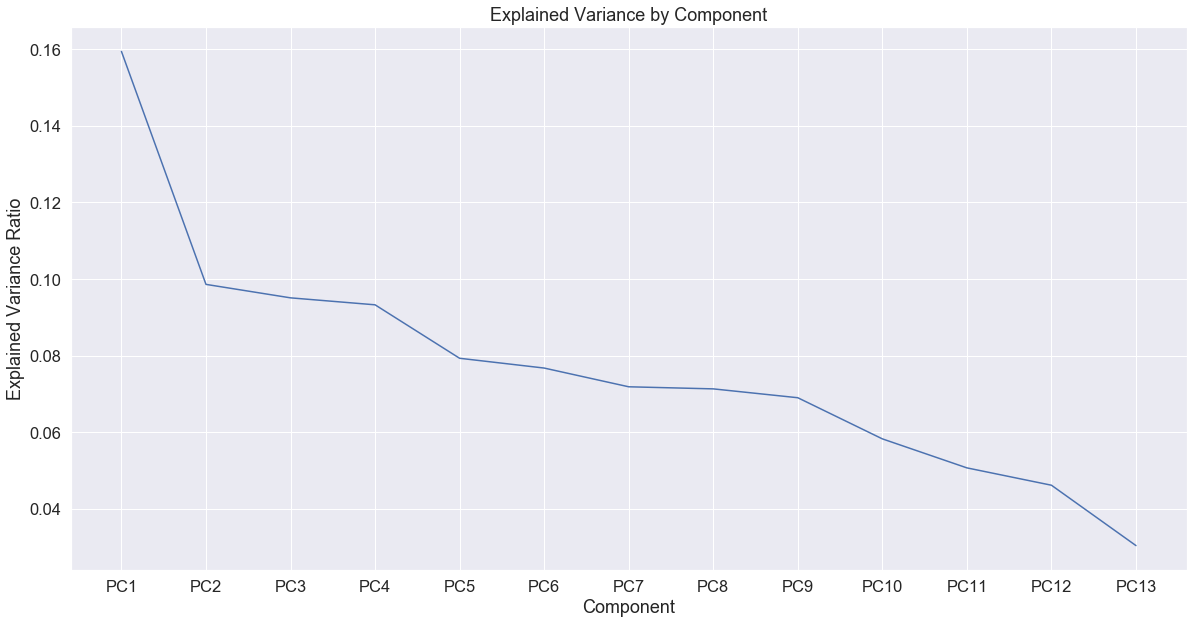

In [101]:
#scree plot between components and Explained variance ratio
plt.figure(figsize=(20,10))
plt.plot(pcsSummary[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

In [102]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns, 
                                index=df_PCA.iloc[:,0:].columns)
pcsComponents_df

PC1       PC2       PC3       PC4       PC5  \
FixedAcidity       -0.001607  0.002097 -0.036999  0.004450  0.019590   
VolatileAcidity    -0.018753  0.020215 -0.062342  0.007608 -0.028169   
CitricAcid          0.024695 -0.063202  0.016051 -0.031290  0.977322   
ResidualSugar      -0.002175  0.958687  0.122981  0.239675  0.066510   
Chlorides          -0.019911 -0.131756 -0.540998  0.821484  0.021934   
FreeSulfurDioxide   0.027204 -0.235067  0.820033  0.512414 -0.019990   
TotalSulfurDioxide -0.021155  0.044318  0.097756 -0.019428  0.092573   
Density            -0.007921 -0.004353 -0.004792  0.028217 -0.011946   
pH                  0.002659 -0.004320 -0.006615  0.002773  0.007632   
Sulphates          -0.000985 -0.040091 -0.032973  0.050418  0.159959   
Alcohol             0.002951  0.004669 -0.021913 -0.013841 -0.039580   
LabelAppeal         0.998587  0.008862 -0.031780  0.003583 -0.022029   
AcidIndex           0.013809 -0.013663 -0.045038  0.012967  0.044157   

                         PC6       PC7       PC8       PC9      PC10  \
FixedAcidity       -0.182888  0.397598  0.133879  0.847338  0.135199   
VolatileAcidity    -0.580317 -0.163083  0.772875 -0.175018 -0.032075   
CitricAcid         -0.047455 -0.178098 -0.024949  0.042517  0.025421   
ResidualSugar      -0.041471  0.007557 -0.044666 -0.002236 -0.003178   
Chlorides           0.098552 -0.052210  0.015729  0.006442  0.010801   
FreeSulfurDioxide  -0.083616 -0.014272  0.008406  0.022906  0.019247   
TotalSulfurDioxide  0.737781  0.215504  0.605162 -0.045430  0.129146   
Density             0.026463  0.050591  0.020864  0.001431 -0.034421   
pH                  0.004369  0.003753  0.032101 -0.055227 -0.008892   
Sulphates          -0.218507  0.845924 -0.084153 -0.442850  0.000174   
Alcohol            -0.091596 -0.077730 -0.070347 -0.111696  0.979941   
LabelAppeal         0.011239  0.005989  0.027858 -0.006982 -0.001235   
AcidIndex          -0.088361  0.099668  0.036212  0.187751 -0.036337   

                        PC11      PC12      PC13  
FixedAcidity       -0.032819  0.075241 -0.213929  
VolatileAcidity     0.002849 -0.026476 -0.037848  
CitricAcid          0.021125  0.002304 -0.038746  
ResidualSugar       0.001193  0.003646  0.011002  
Chlorides          -0.028308 -0.003175 -0.024357  
FreeSulfurDioxide  -0.006675  0.001862  0.019285  
TotalSulfurDioxide -0.033430 -0.030217  0.036450  
Density             0.993693  0.007090 -0.081236  
pH                  0.003776  0.986891  0.147320  
Sulphates          -0.036870 -0.021660 -0.028566  
Alcohol             0.046629 -0.003113  0.058365  
LabelAppeal         0.005062 -0.001897 -0.014785  
AcidIndex           0.074197 -0.134928  0.957153

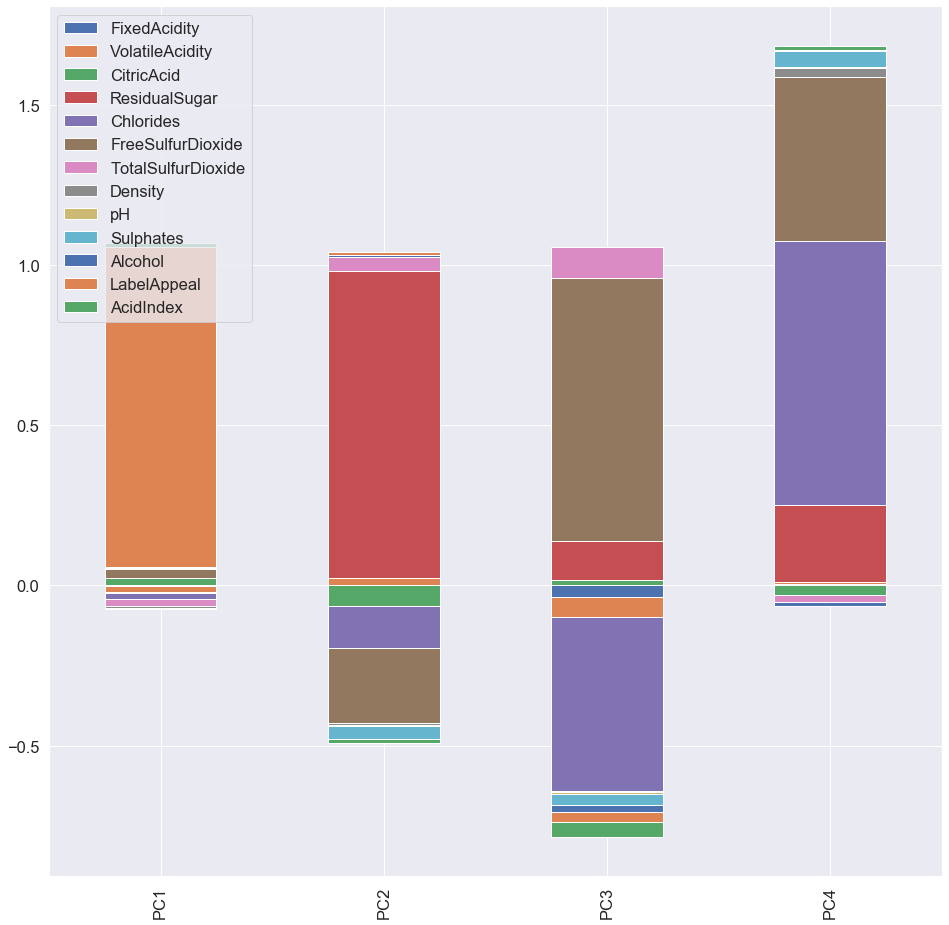

In [103]:
pcsComponents_df[['PC1','PC2','PC3','PC4']].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))